## DATA MINING AND INSIGHT DISCOVERY ON HOUSING DATASET  IN INDONESIA

#### * data preprocessing and standardization.
##### * Checking data skewness and kurtosis
##### * Outlier detection and removal 

In [20]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
from pylab import rcParams
rcParams['figure.figsize'] = 20, 16

path = 'D:\\FREELANCER\\DATAMINING AND INSIGHTHOUSE PRICES'
os.chdir(path)
hosue_df = pd.read_csv(os.path.join('DATASET', 'Al-Muzahmiyya.csv'))
hosue_df['last_updated'] = pd.to_datetime(hosue_df.last_updated)
hosue_df = hosue_df.iloc[:, 1:]
hosue_df = hosue_df.drop(['created_at', 'address'], axis = 1)
hosue_df.set_index('last_updated', inplace = True)
hosue_df.sort_values(by = 'last_updated', inplace = True)
#sort the data
print('See data descroiption: {}\n'.format(hosue_df.describe()))
print('*'*40)
print('Skew of data: {}\n'.format(hosue_df.skew()))
print('*'*40)
print('Kurt of data: {}\n'.format(hosue_df.kurt()))
print('*'*40)



See data descroiption:                            price   meter_price          age          area  \
count  6397.000000  6.397000e+03  6.397000e+03  6397.000000  6.397000e+03   
mean   3199.000000  9.277072e+08  3.373505e+05     0.672346  4.663239e+05   
std    1846.799168  2.950779e+10  2.685000e+07     3.227298  2.692307e+07   
min       1.000000  3.000000e+00  0.000000e+00     0.000000  0.000000e+00   
25%    1600.000000  7.000000e+04  0.000000e+00     0.000000  6.450000e+02   
50%    3199.000000  2.000430e+05  2.500000e+01     0.000000  2.250000e+03   
75%    4798.000000  7.000000e+05  1.200000e+02     0.000000  7.750000e+03   
max    6397.000000  1.110000e+12  2.147480e+09    36.000000  2.150000e+09   

             floor         beds  living_room   apartments       stores  \
count  6397.000000  6397.000000  6397.000000  6397.000000  6397.000000   
mean      0.079569     0.789120     0.403314     0.188526     0.044239   
std       0.398657     1.660174     0.886583     1.346401    

##### Plot of unstandardized dataset

##### * Observe positive skewness in 
###### * age 
###### * area
###### * floor
###### * living room
###### * meter
###### * price
###### * rooms
###### *etc...


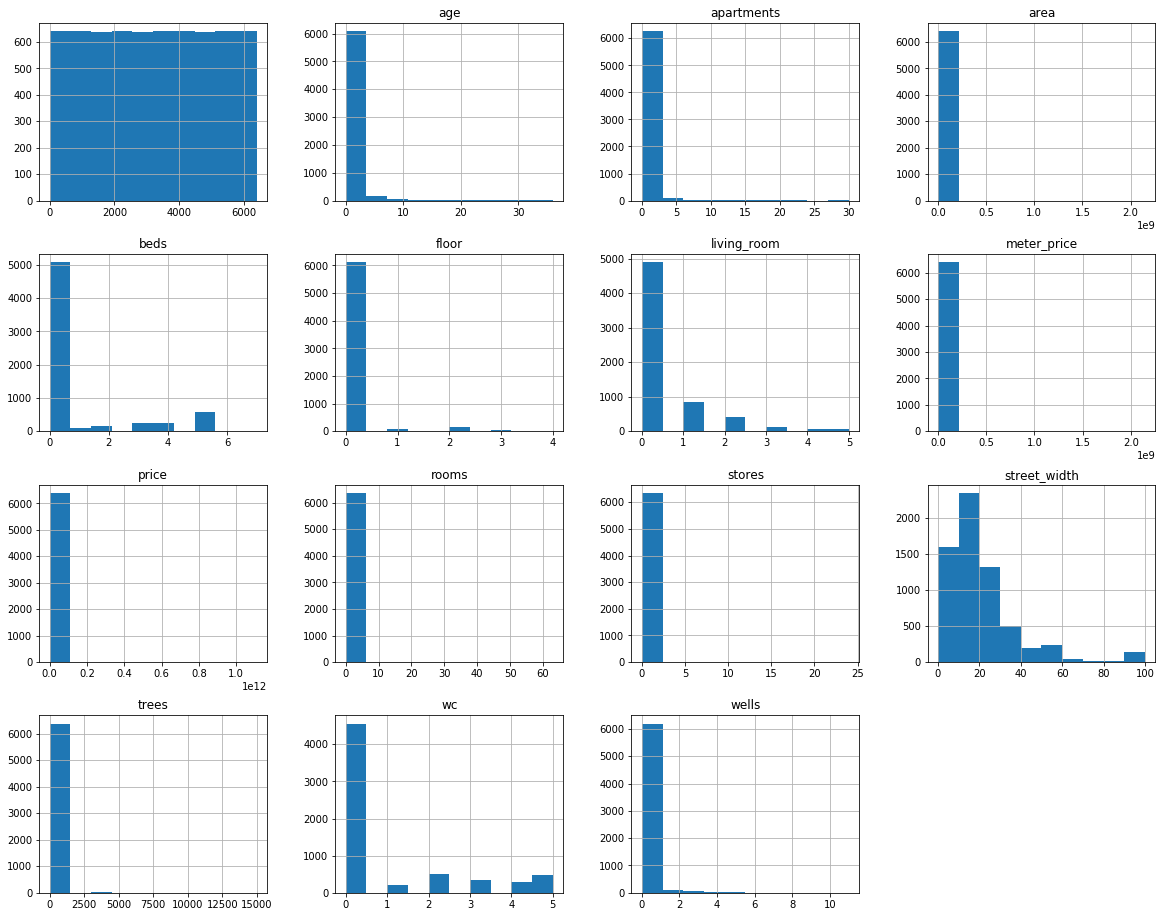

In [21]:
hosue_df.hist()
plt.show()

In [22]:
#standardize numeric dataset
def standardize_houseprize(df, standardize = None, 
                           logg = None, normalize = None):
  df = df.copy(deep = True)
  #drop all objects
  #and leaving all float64 and int64 datatypes
  for ii in hosue_df.columns:
    if hosue_df[ii].dtype == object:
      df = df.drop(ii, axis = 1)
  
  '''
  #standardize values
        x - mean of x
  z = --------------------
          sd of x
          
  #log values
  
  z = log(x)
  
  #normalize values
  
          x - min(x)
  z = --------------------
          max(x) - min(x)
  '''
  
  #standard deviation
  def stdev(df):
    return np.std(df, axis = 0)
  #mean deviation
  def mean_dev(df):
    return df - np.mean(df, axis = 0)
  #log of data
  def logg_dat(df):
    return np.log(df)
  
  #standardized values for columns
  if standardize:
    for ii, ij in enumerate(df.columns):
      print(ii, ij)
      df['{}'.format(ij)] = mean_dev(df.loc[:, '{}'.format(ij)])/stdev(df.loc[:, '{}'.format(ij)])
  elif logg:
    df = logg_dat(df)
    df = df.replace([np.inf, -np.inf, np.nan], 0)
  elif normalize:
    for ii, ij in enumerate(df.columns):
      df['{}'.format(ij)] = (df.loc[:, '{}'.format(ij)] - min(df.loc[:, '{}'.format(ij)]))/\
      (max(df.loc[:, '{}'.format(ij)]) - min(df.loc[:, '{}'.format(ij)]))
  else:
    pass
    
  return df

df = standardize_houseprize(hosue_df)
df_standard = standardize_houseprize(hosue_df, standardize = True)
log_data = standardize_houseprize(hosue_df, logg=True)
df_normal = standardize_houseprize(hosue_df, normalize = True)

0 price
1 meter_price
2 age
3 area
4 floor
5 beds
6 living_room
7 apartments
8 stores
9 rooms
10 wells
11 trees
12 wc
13 street_width


C:\Users\kennedy\Anaconda3\envs\NeuralNet\lib\site-packages\ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in log


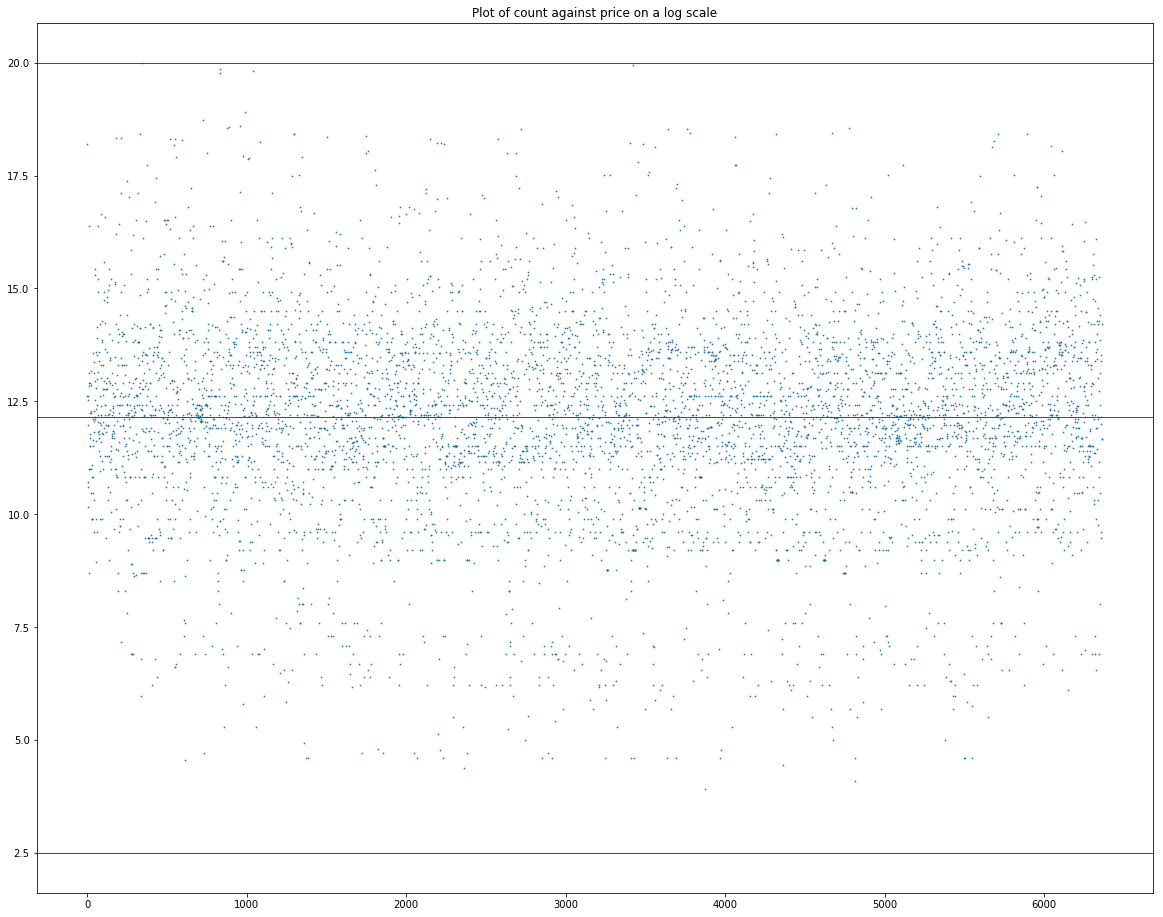

In [25]:
log_data.describe()
#remove outliers within a certain price scale
after_outl = log_data[(log_data.price < 20.0) & (log_data.price > 2.5)]
#plot log_price
plt.scatter(np.arange(after_outl.shape[0]), after_outl.price, s = .5)
plt.title('Plot of count against price on a log scale')
plt.axhline(y = 20, linewidth=1, color='r')
plt.axhline(y = 2.5, linewidth=1, color='r')
plt.axhline(y = 12.159753818376581, linewidth=1, color='r')


###### Work on all numeric columns after dropping object columns

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000012E91A3C390>,
      dtype=object)

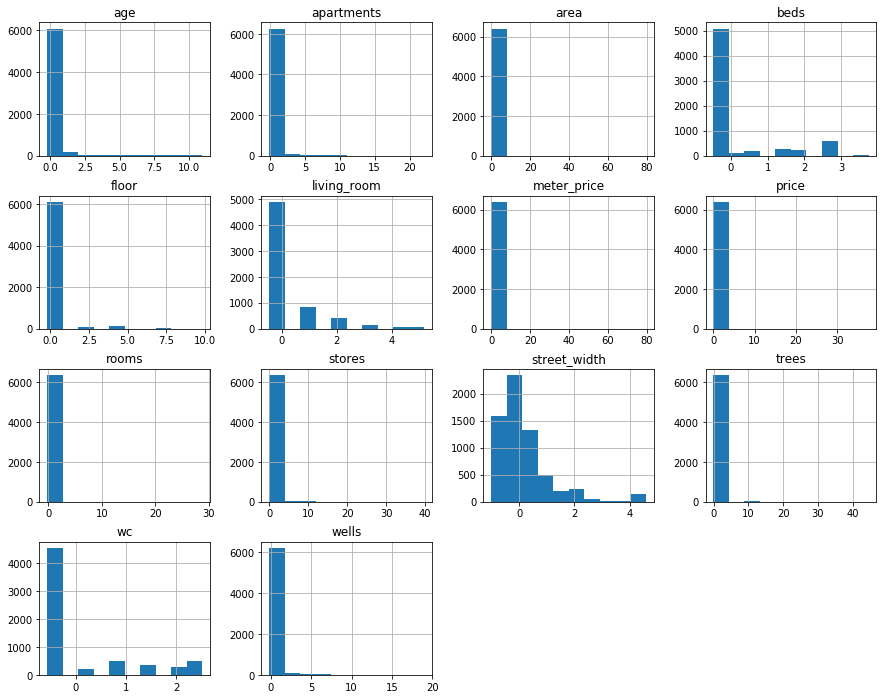

In [28]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 12
#histogram of standardized dataset
df_standard.hist()


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000012E926587B8>,
      dtype=object)

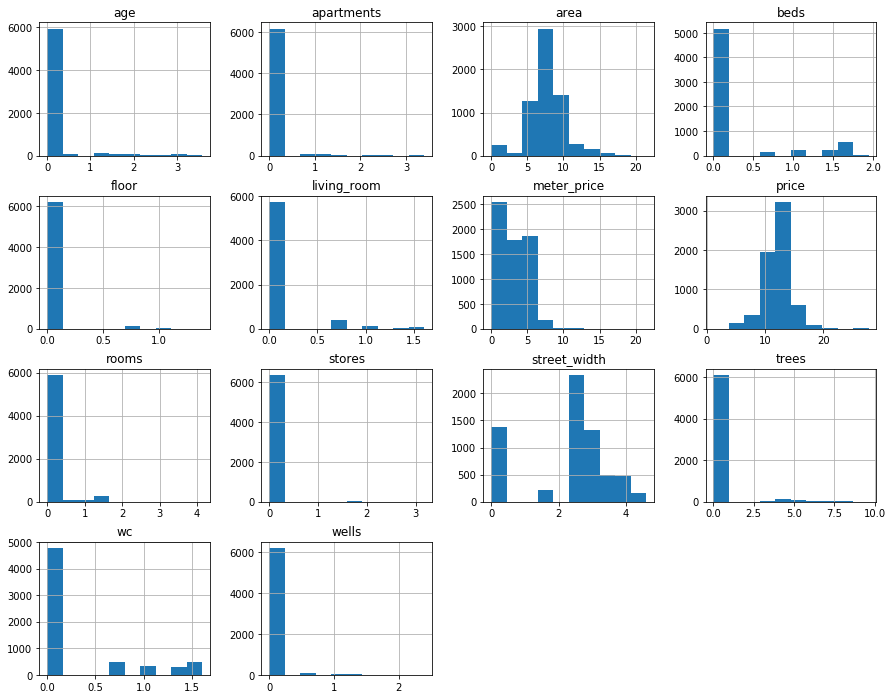

In [29]:
#hist of log data
log_data.hist()


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000012E9305BBA8>,
      dtype=object)

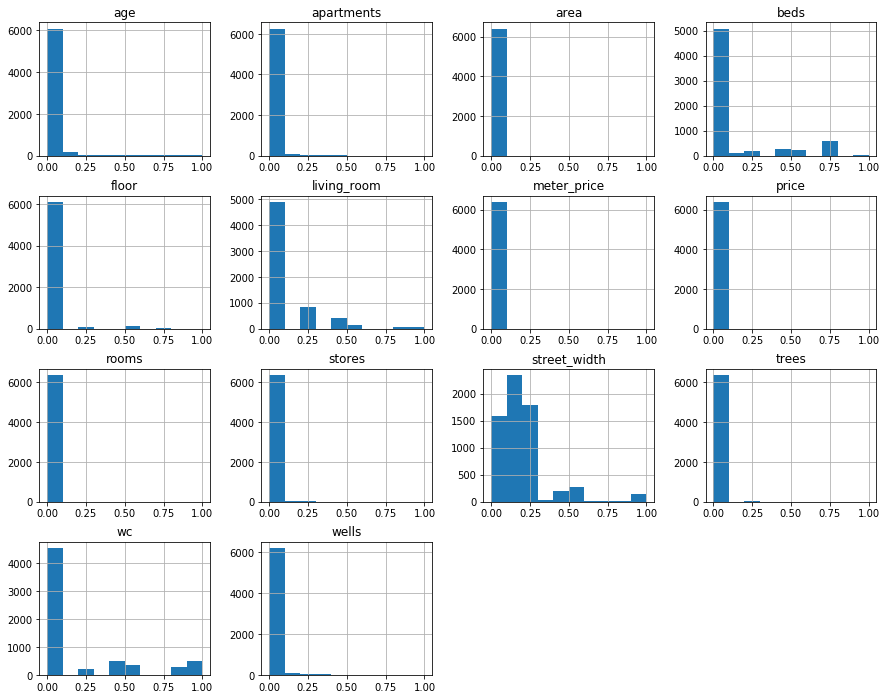

In [30]:
#histogram of normalized data
df_normal.hist()


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000012E92D645C0>,
      dtype=object)

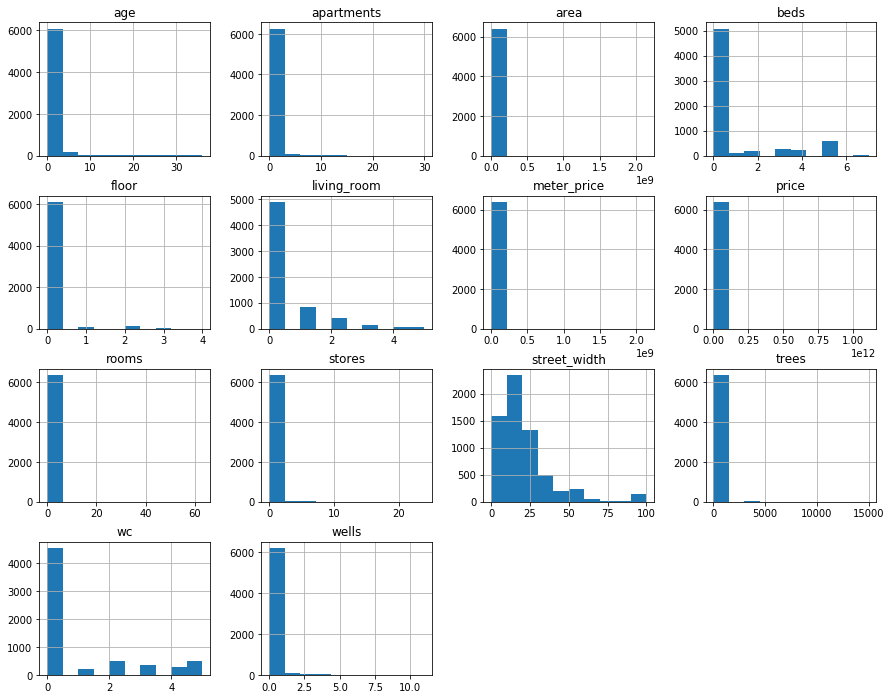

In [31]:
#hist of unscaled dataset
df.hist()


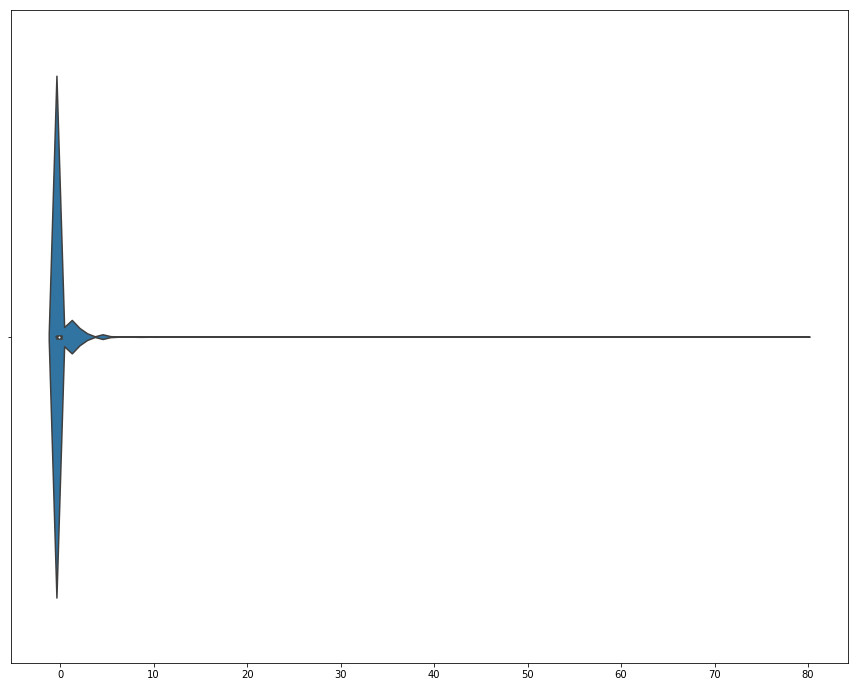

In [32]:
#violin plot of unscaled dataset
sns.violinplot(df_standard)


#### Pairplot shows the correlation distribution scatter plot amongst all features.

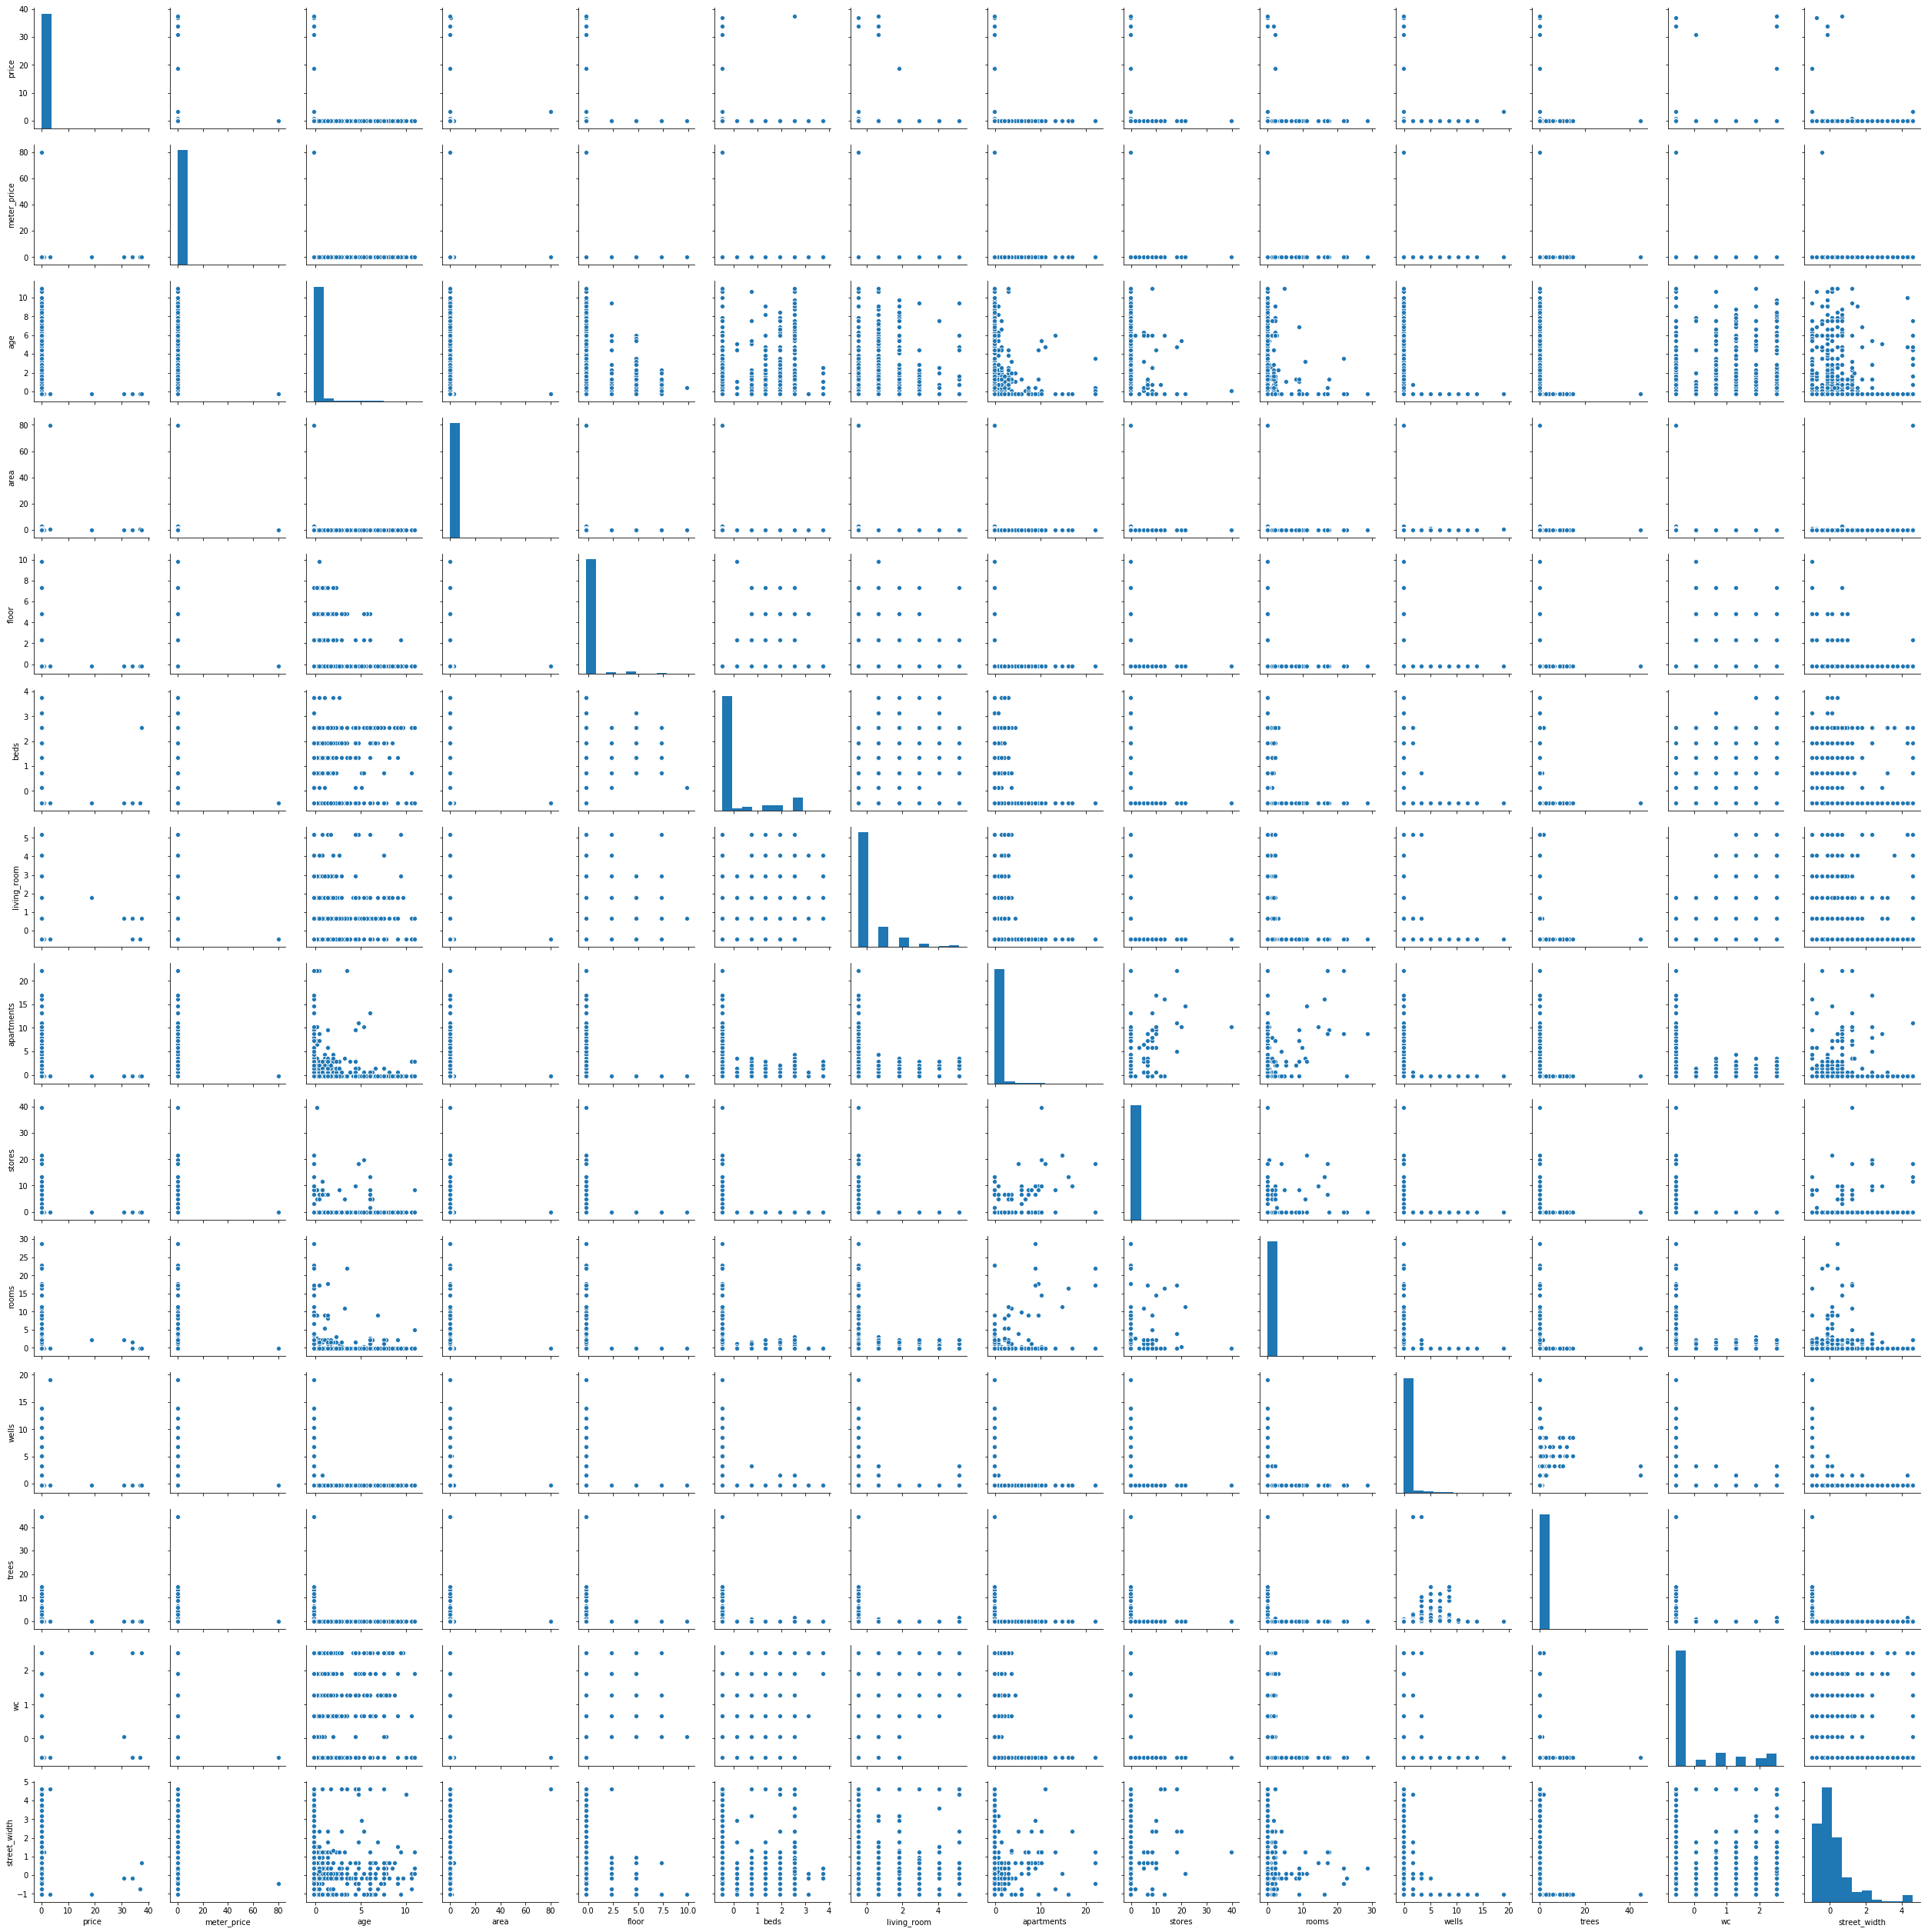

In [33]:
#pairplot of unscaled dataset
sns.pairplot(df_standard)


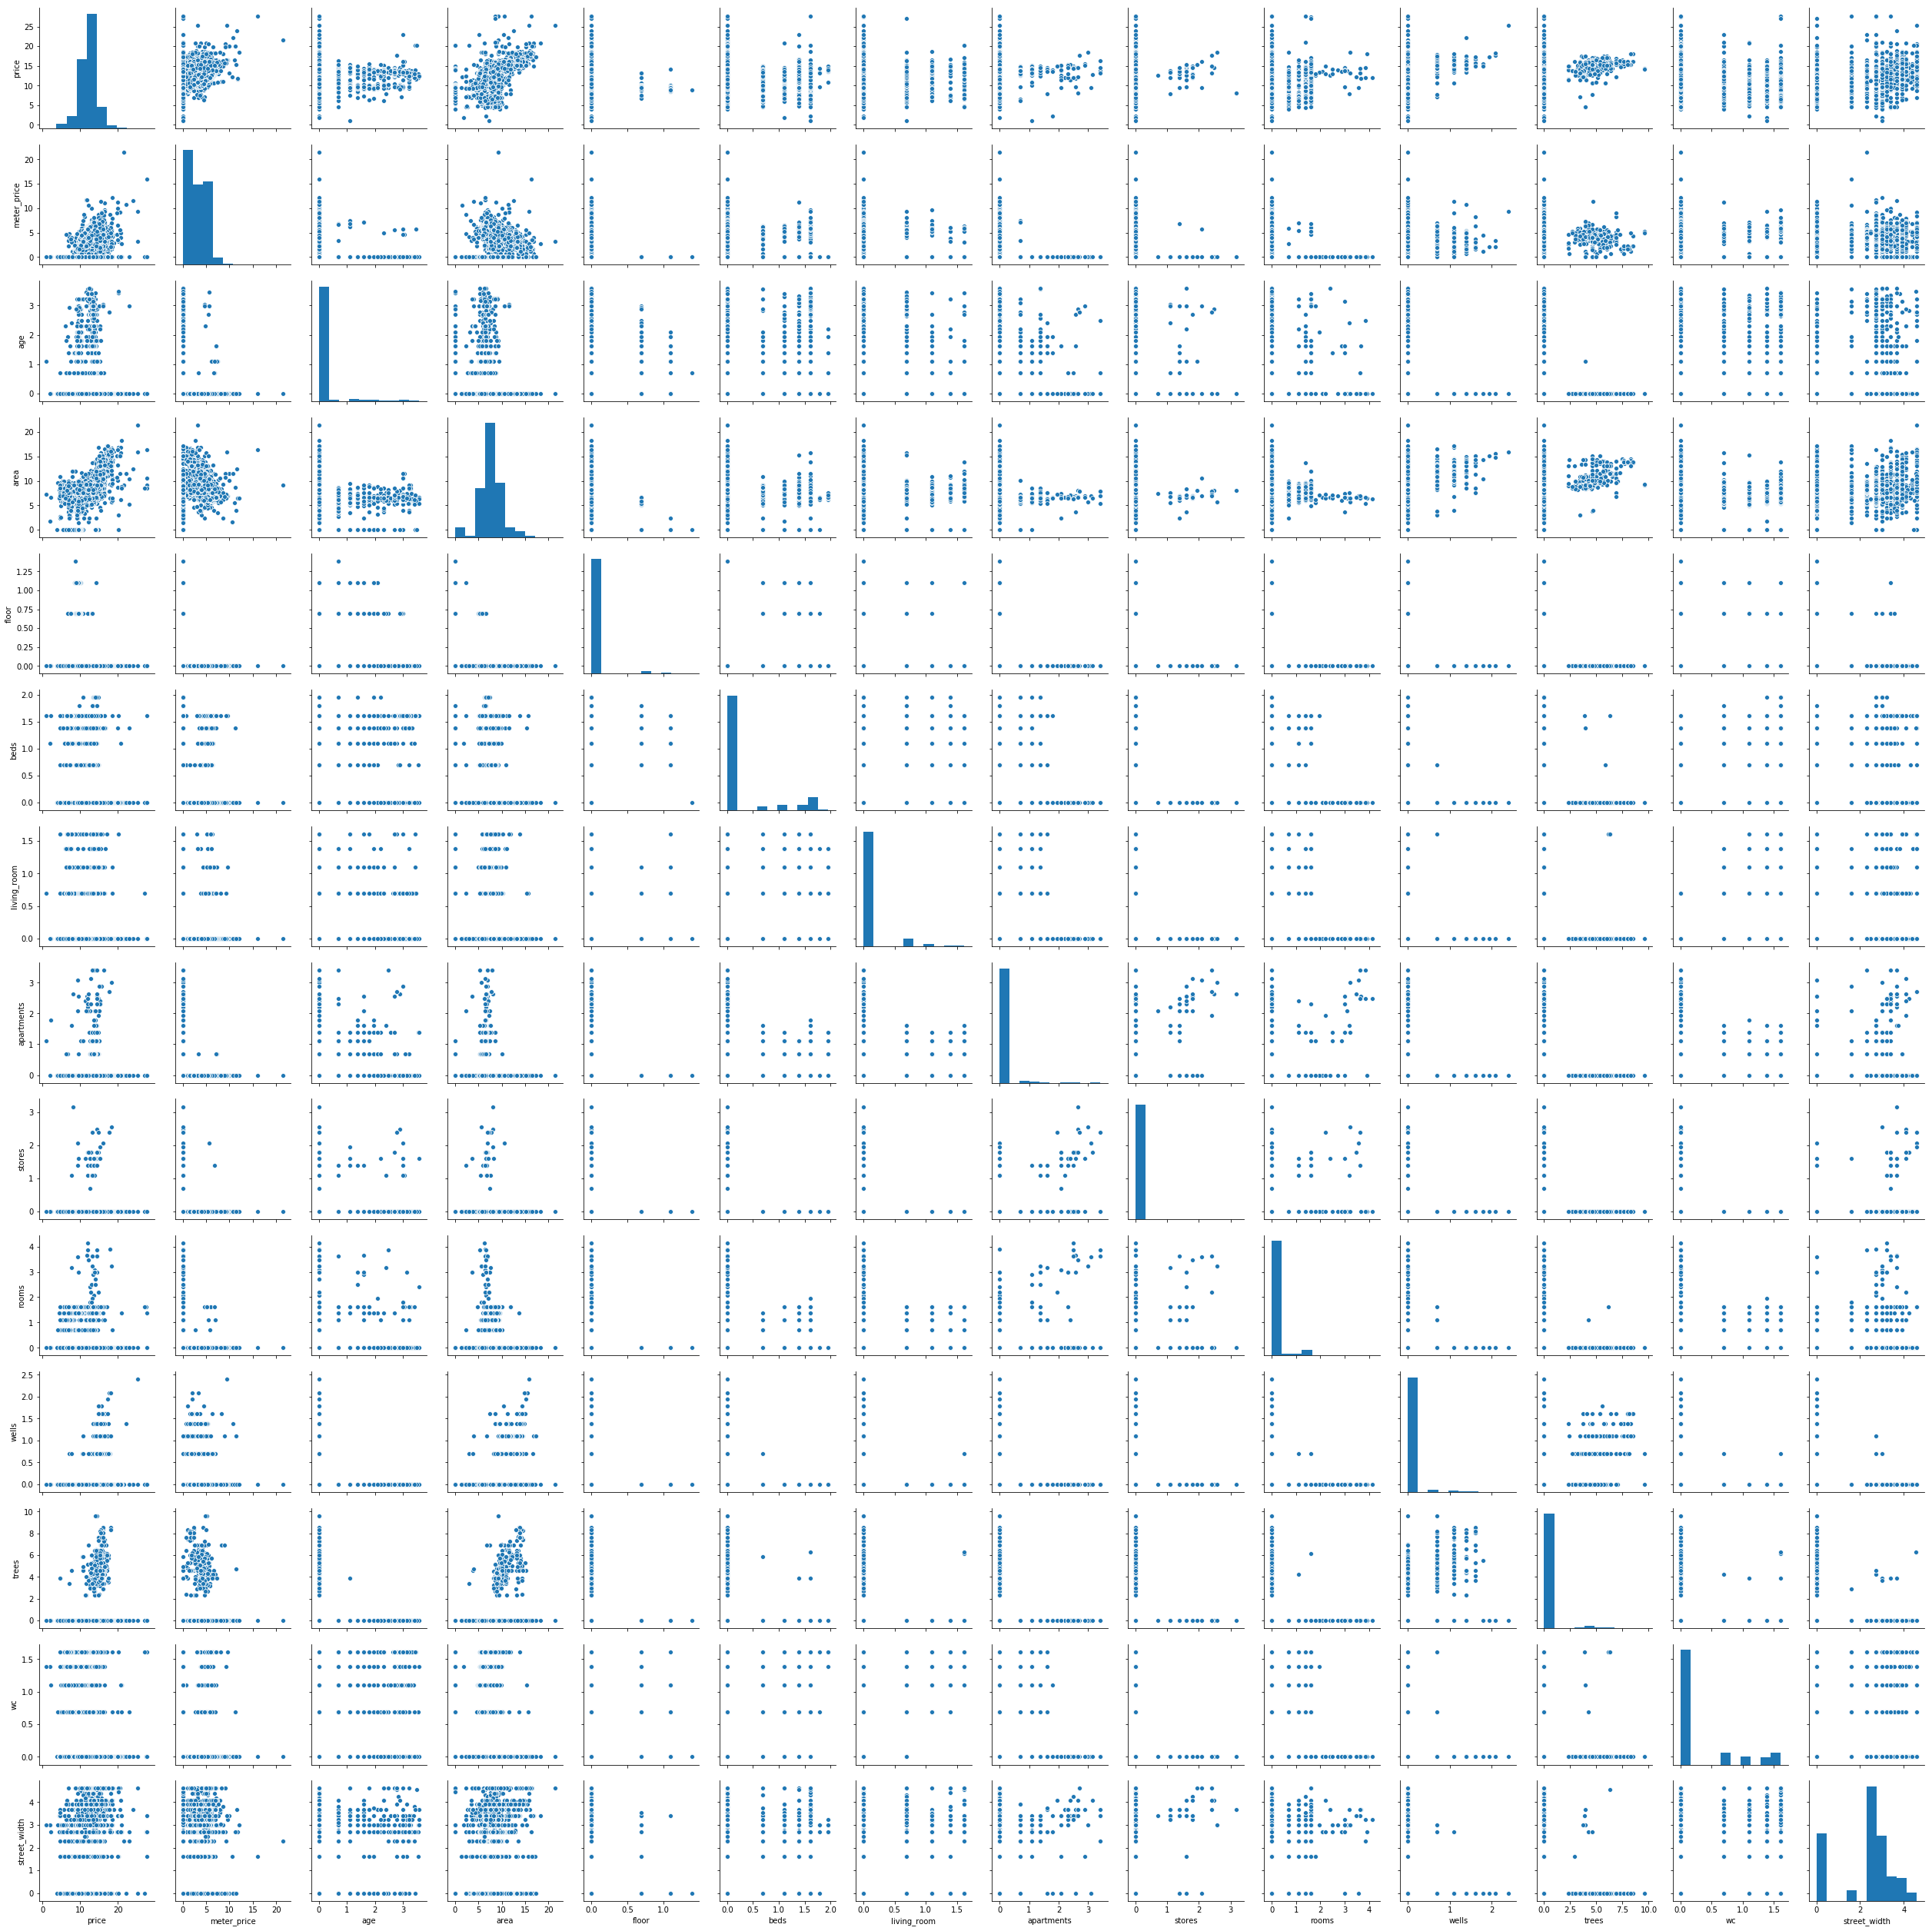

In [34]:
#paiplot of log dataset
sns.pairplot(log_data)


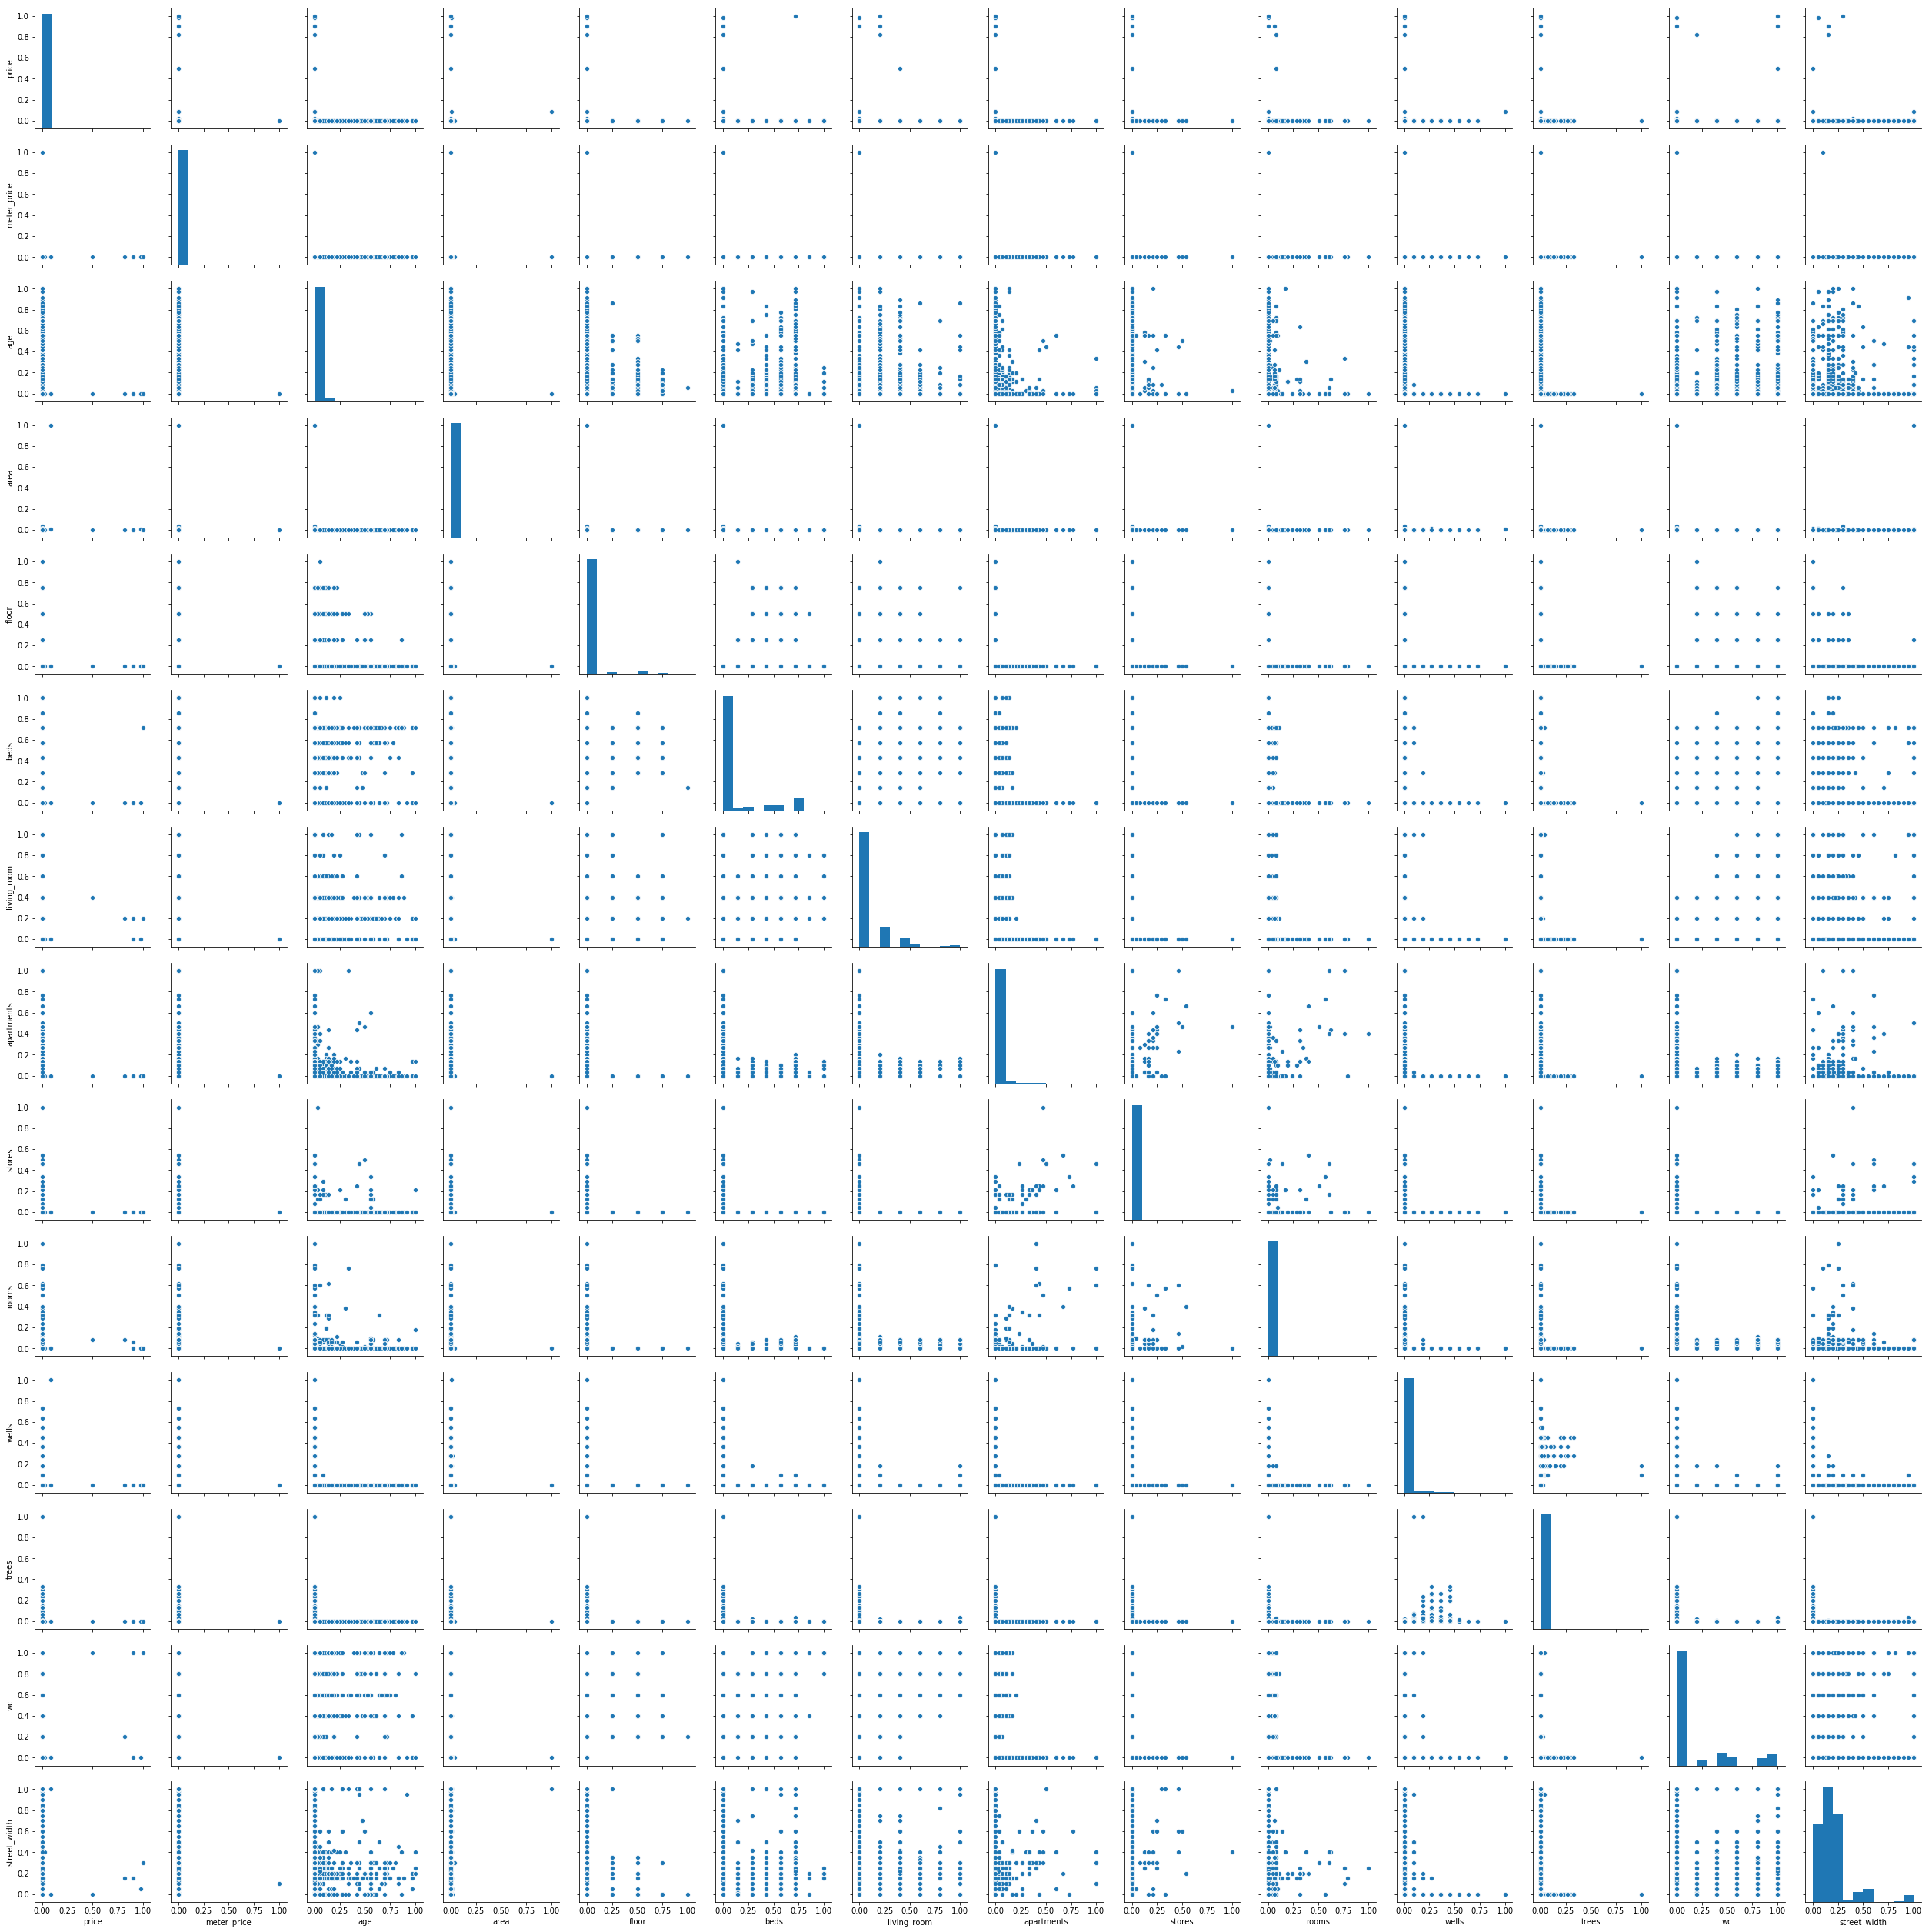

In [35]:
#pairplot of normalized dataset
sns.pairplot(df_normal)

#### Not alot can be deduced from the standardized dataset

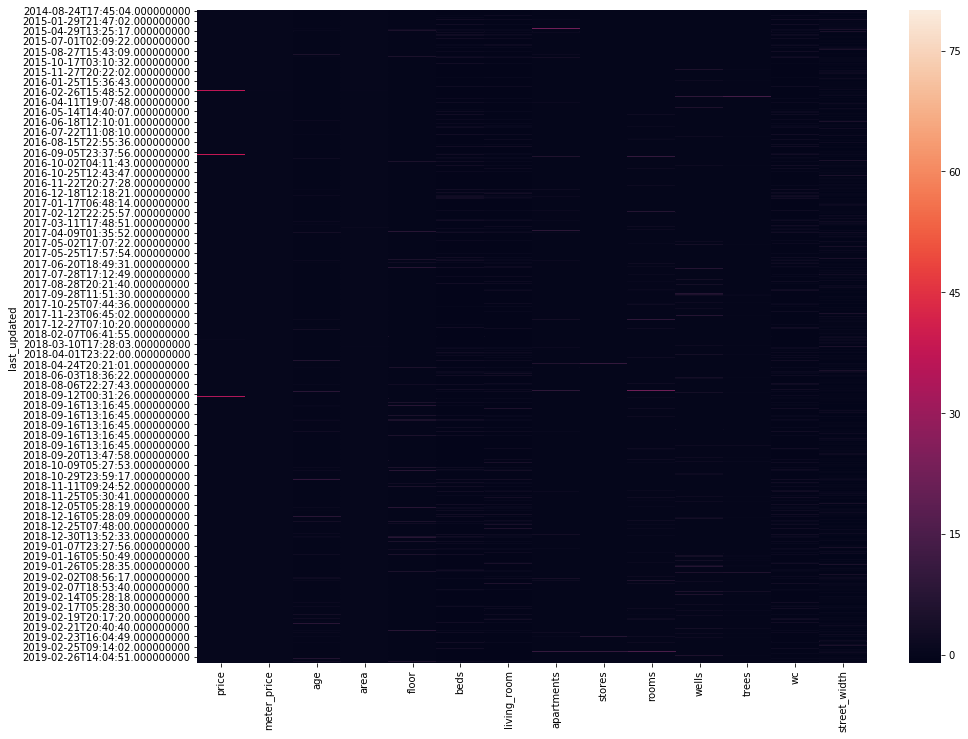

In [36]:
#heat map of standardized dataset
sns.heatmap(df_standard)

#### Here you will find Price and area have very high correlation..The higher the area, the bigger the price. Price also has quite some correlation with meter_price. This is because the bigger the area, the higher the price and hence, the higher the power consumption(thereby increasing the meter reading.)

###### *more is explained further below..

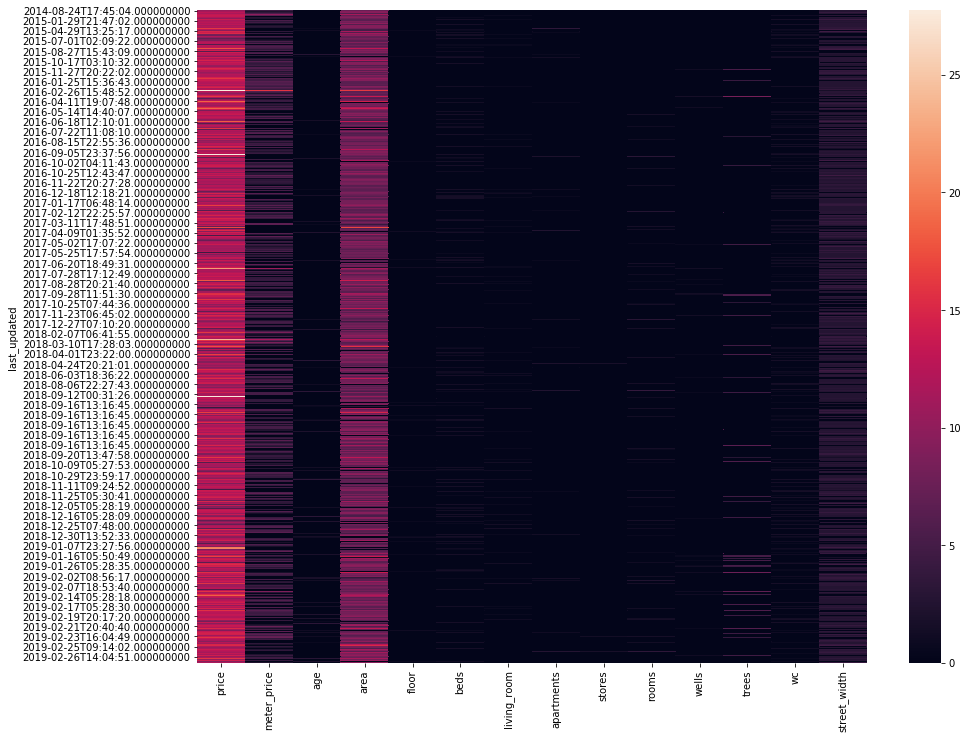

In [37]:
#heatmap of logged dataset
sns.heatmap(log_data)


##### From here you will realize the *age and floor have correlation, *beds and living_room hae high correlation then wc and street_width have high correlation also.

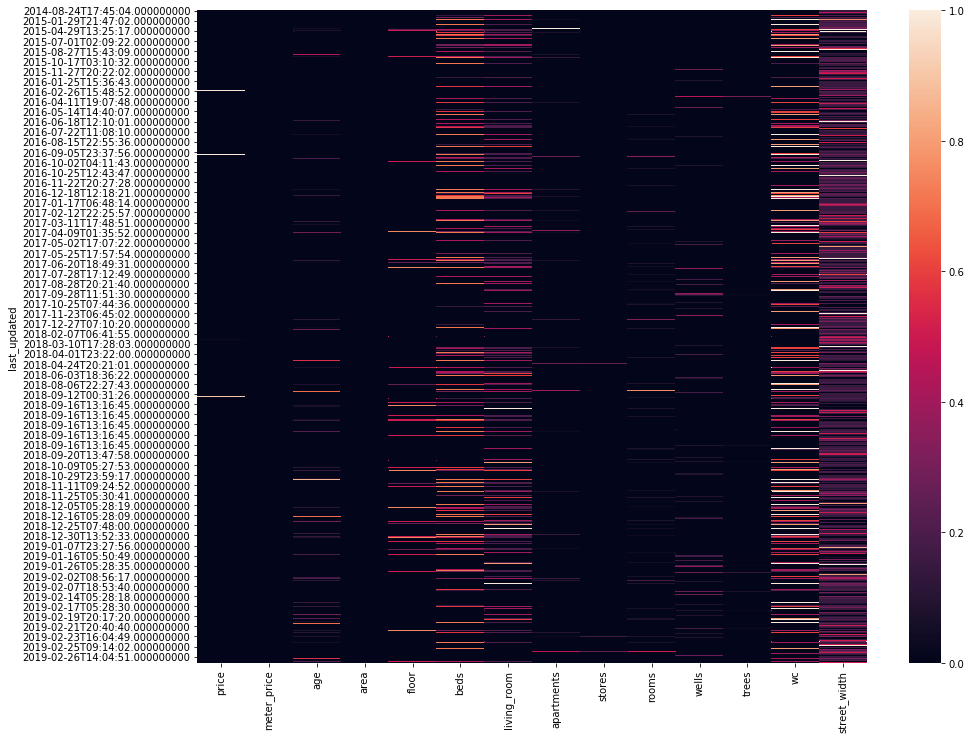

In [38]:
#heatmap of normalized dataset
sns.heatmap(df_normal)

#####  We can find from here what features are highly correlated.
###### * Note that this is ofcourse without the CATEGORICAL VARIABLE whic will be introduced later during analysis phase
######  * The correlation values are very clear in the log_data than in standardized or normalized dataset
#####  --> PRICE has a close but not so high correlation with AREA
#####  --> PRICE also has some correlation with METER PRICE
#####  --> PRICE also has some correlation with WELLS
#####  --> PRICE also has some correlation with TREES
#####  --> PRICE has a much lower correlation with APPARTMENT
#####  --> PRICE has a close but not so high correlation with STREET WIDTH

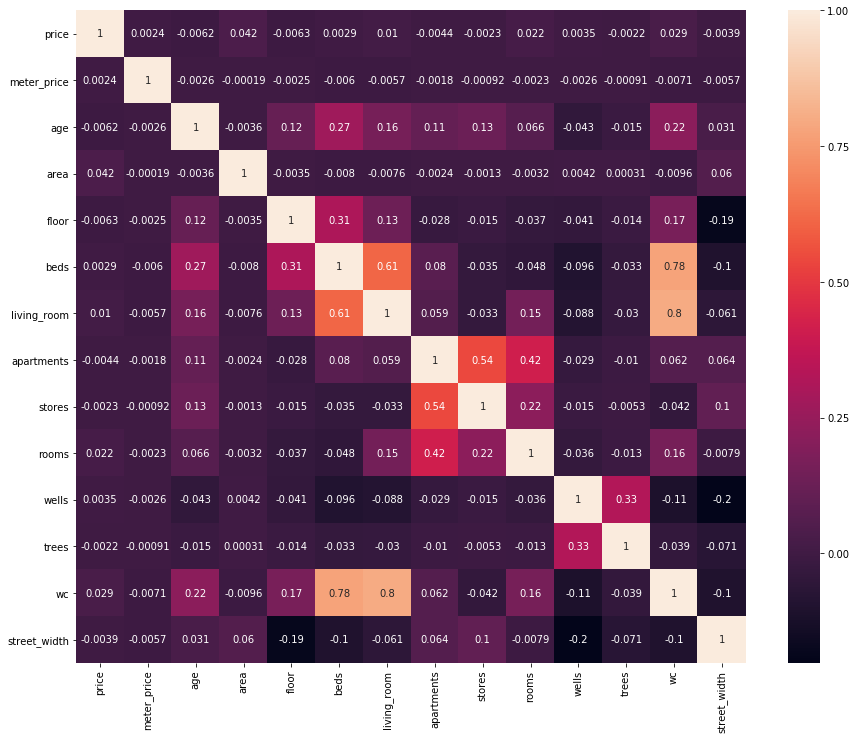

In [39]:
#heatmap of correlation between dataset
sns.heatmap(df_standard.corr(), annot=True);plt.show()

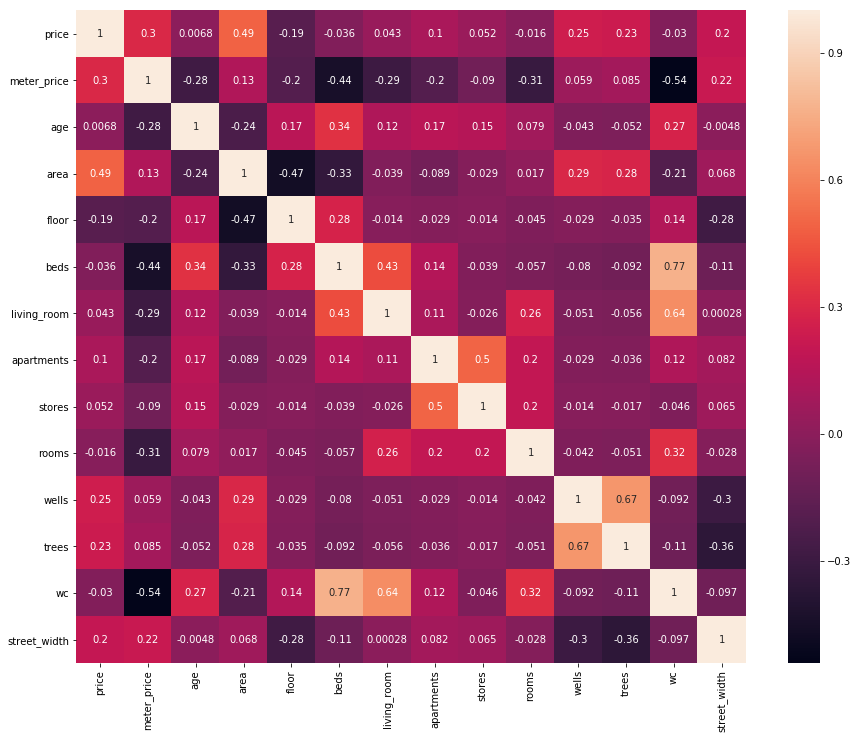

In [40]:
#heatmap of log_data correlation
sns.heatmap(log_data.corr(), annot=True);plt.show()

###### * FLOOR has some correlation with BEDS
###### * APPARTMENT has some correlation with ROOMS
###### * Floor has some correlation with STORES
###### * WC has very HIGH correlation with BEDS
###### * WC has very HIGH correlation with LIVING ROOMS


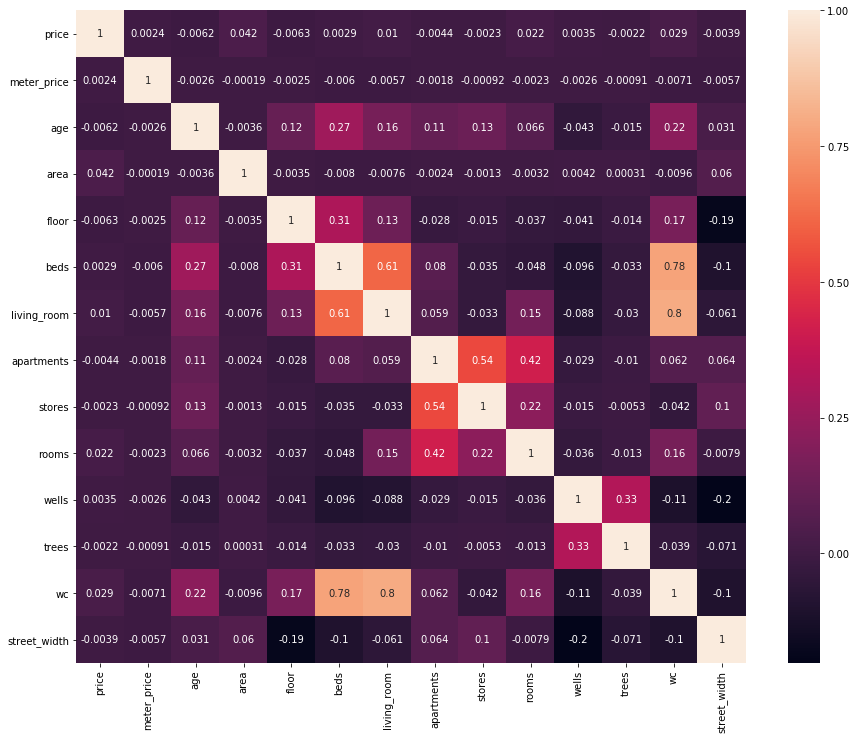

In [41]:
sns.heatmap(df_normal.corr(), annot=True);plt.show()

##### Boxplot shows the presence of outliers in the dataset
###### PRICE AREA AND TREE HAVING THE MOST OUTLIERS

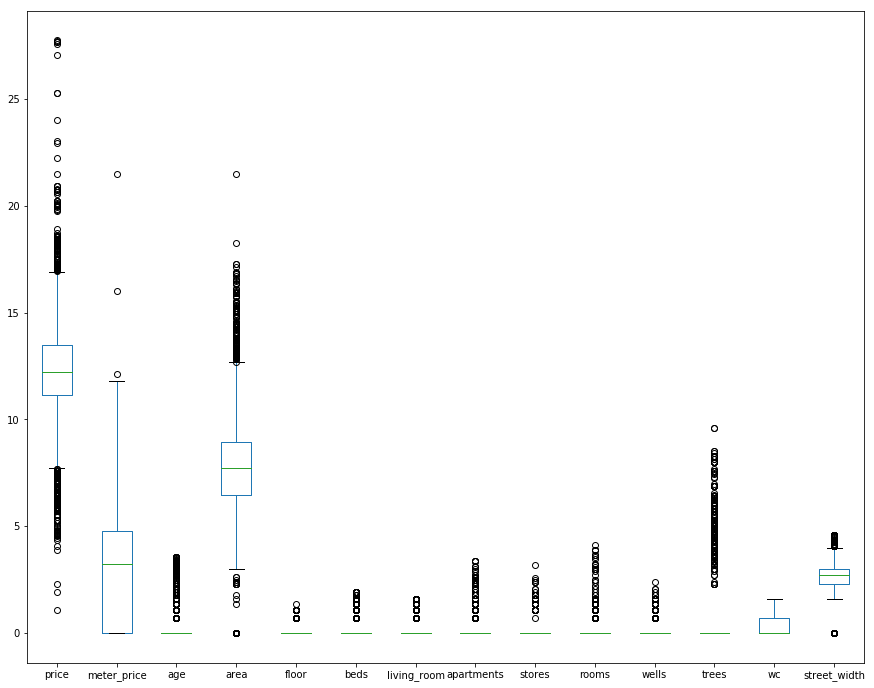

In [42]:
log_data.plot(kind='box')

Text(0.5,1,'Plot of features against price for log_data')

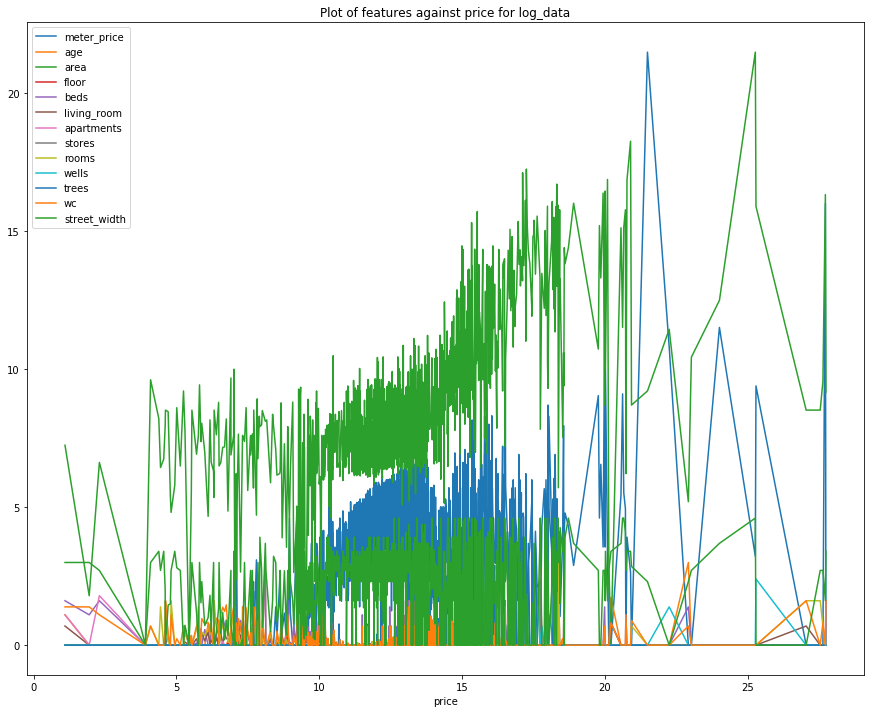

In [52]:
log_data.groupby('price').mean().plot()
plt.title('Plot of features against price for log_data')

Text(0.5,1,'Plot of features against price')

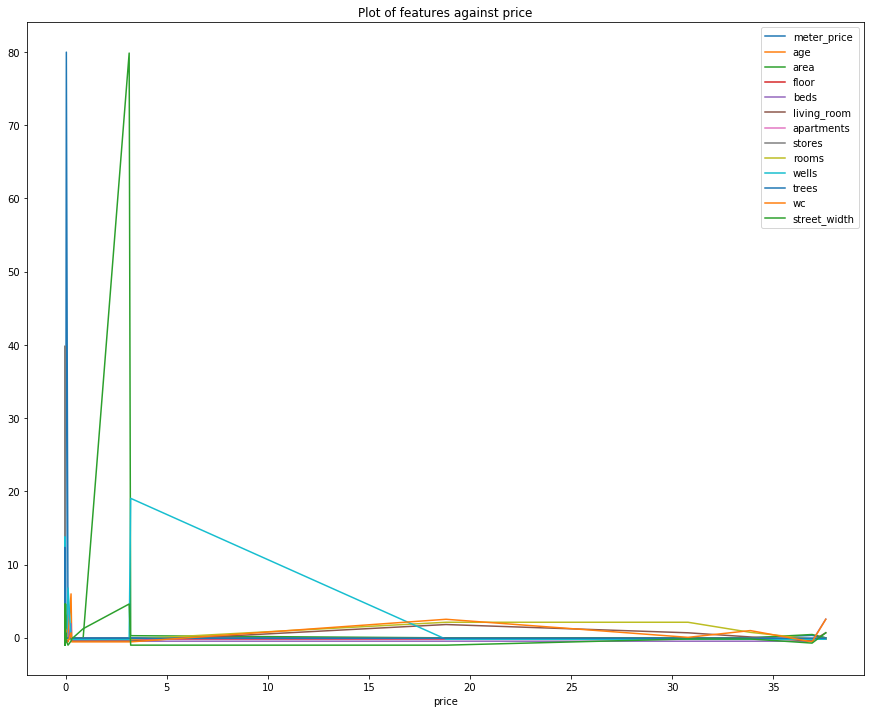

In [51]:
df_standard.groupby('price').mean().plot()
plt.title('Plot of features against price for standardized data')

#### Grouping by ['Type', 'user_type' and 'rent_period']
##### * Grouping by type['Undefined', 'Both', 'Residential']: shows that the mean price is between 1e-9 - 1.5e-9
##### * Grouping by user_type: gives no meaningful insight. meaning the number of agent users and normal user is equal.
##### * Grouping by rent_period: gives no meaningful insight

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000012EA279F828>,
      dtype=object)

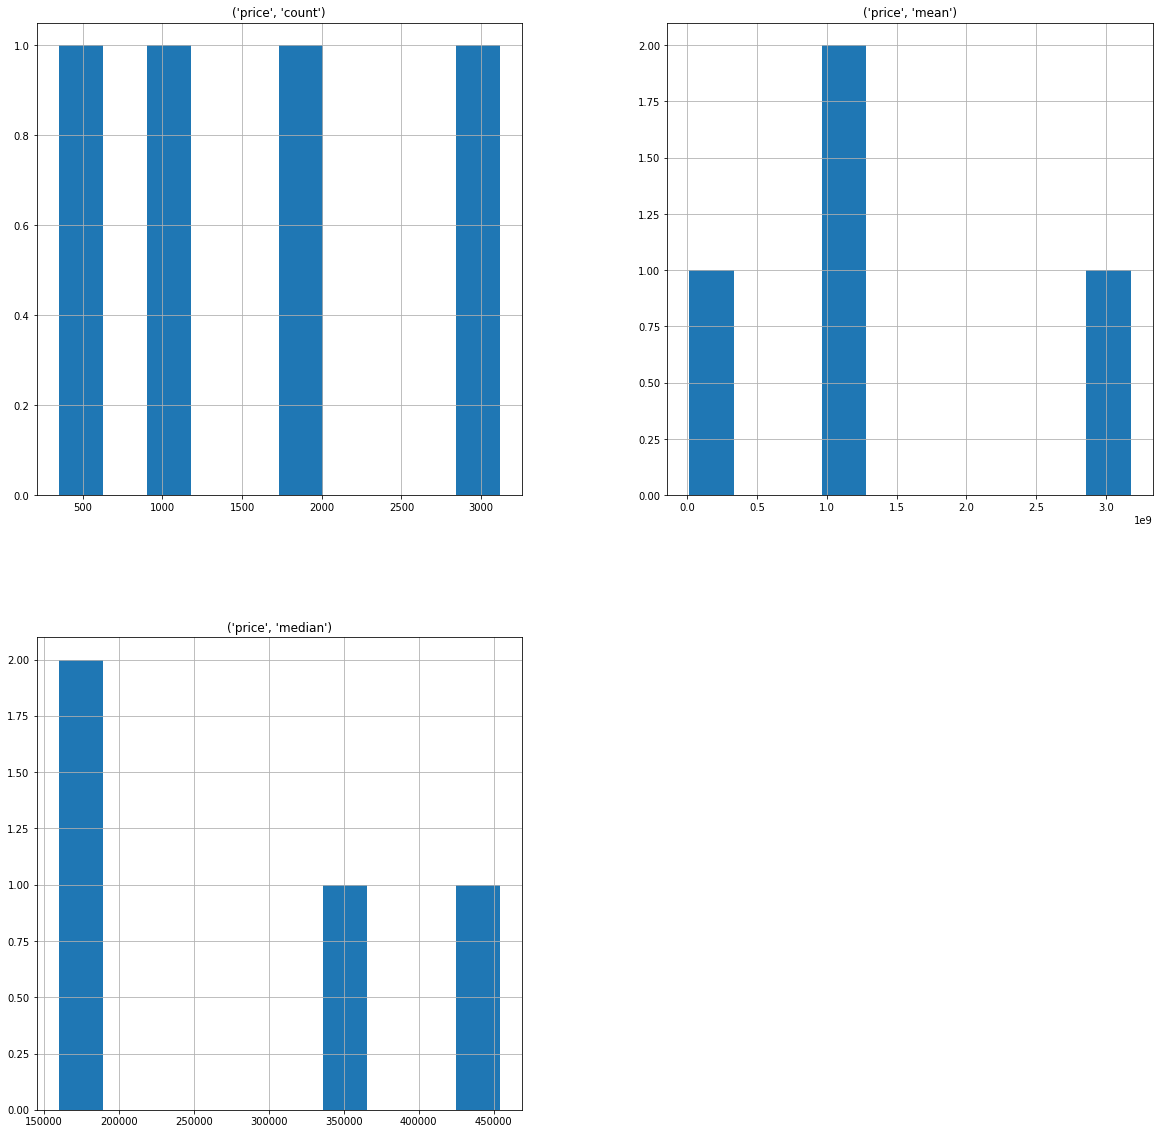

In [89]:
hosue_df.groupby(['type'])[['price']].agg(['mean','median','count']).hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000012EA49BC518>,
      dtype=object)

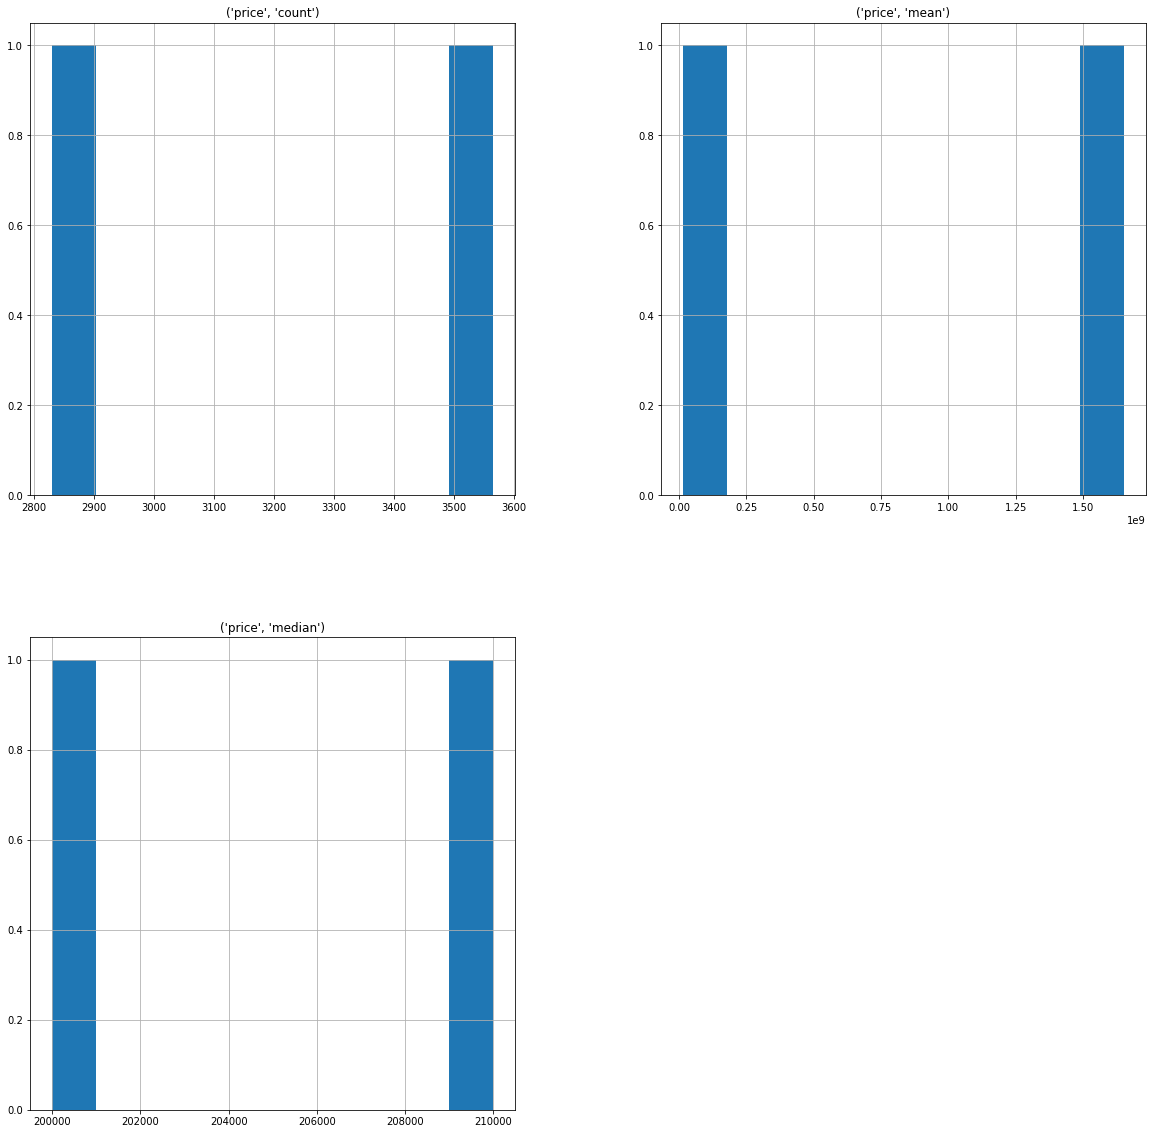

In [90]:
hosue_df.groupby(['user_type'])[['price']].agg(['mean','median','count']).hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000012EA4FC7710>,
      dtype=object)

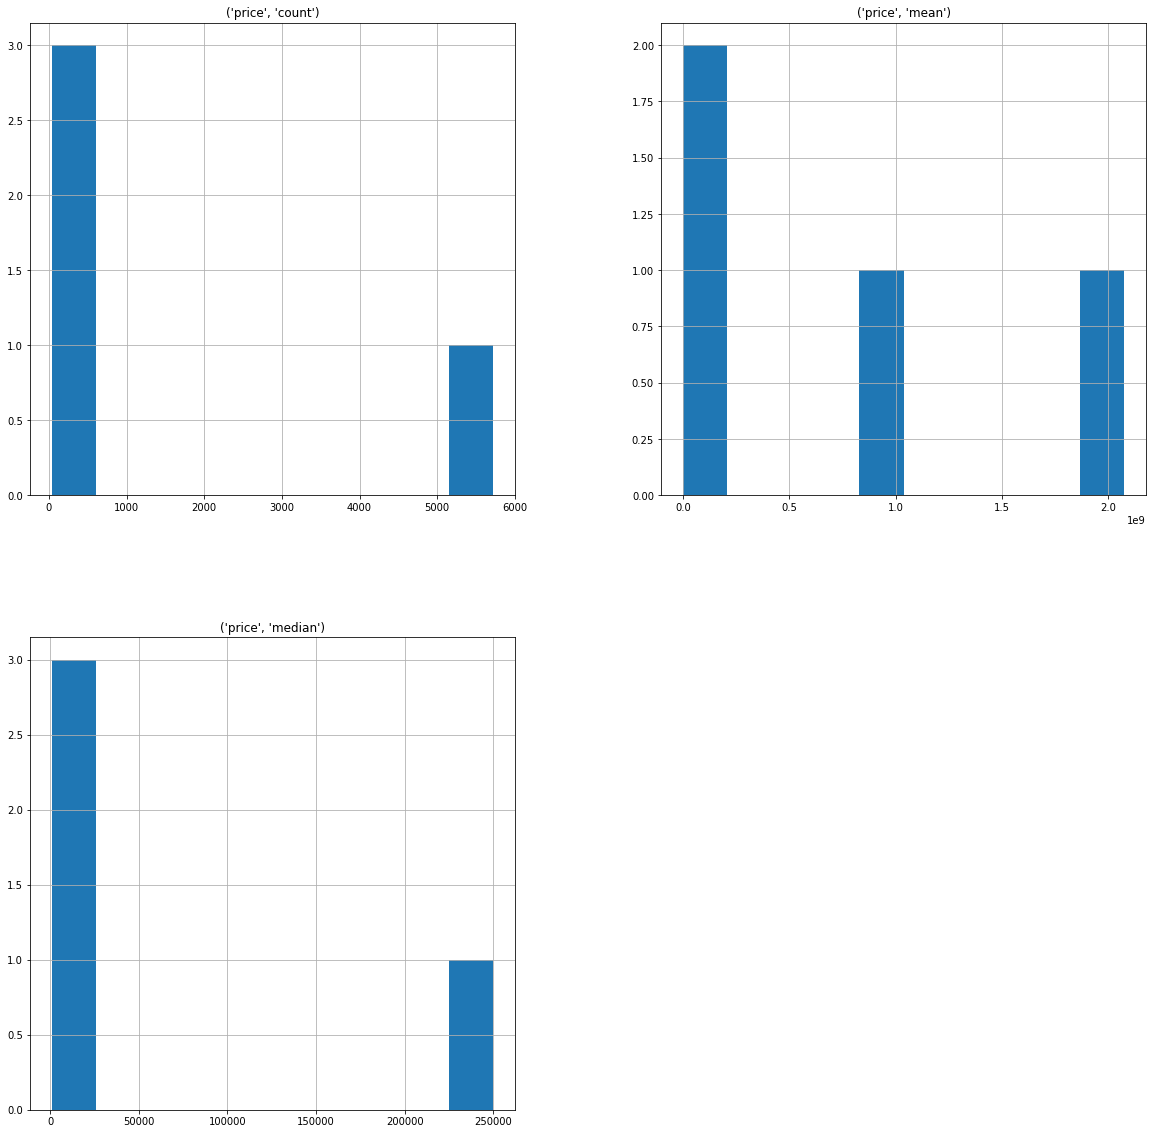

In [91]:
hosue_df.groupby(['rent_period'])[['price']].agg(['mean','median','count']).hist()

###### On 2019-09-16 at about 13:16 there was an unusual behavior in demand for appartment leading to a skyrocketing in price of appartments.
###### This isan unusual behaviour and should be dealt with before modeling the data. Otherwise it would affect the output of our algorithm.

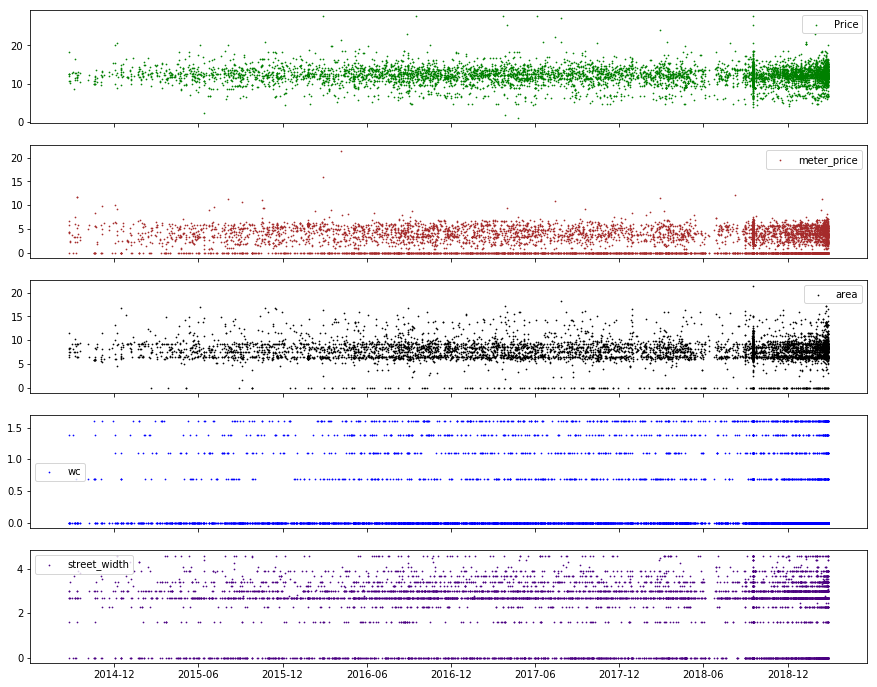

In [57]:
color = ['red', 'green', 'brown', 'black', 'blue', 'indigo']
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 1, sharex= True)
ax1.scatter(log_data.index, log_data.price.values, s = .5, color = color[1], label='Price')
ax1.legend()
ax2.scatter(log_data.index, log_data.meter_price.values, s = .5, color = color[2], label='meter_price')
ax2.legend()
ax3.scatter(log_data.index, log_data.area.values, s = .5, color = color[3], label='area')
ax3.legend()
ax4.scatter(log_data.index, log_data.wc.values, s = .5, color = color[4], label='wc')
ax4.legend()
ax5.scatter(log_data.index, log_data.street_width.values, s = .5, color = color[5], label='street_width')
ax5.legend()

<Figure size 1080x1152 with 0 Axes>

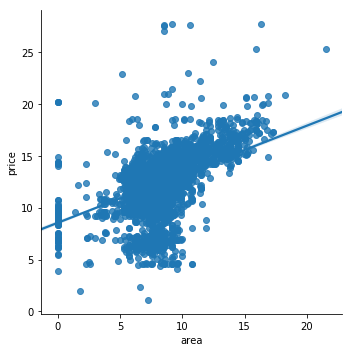

In [64]:
#regression line
plt.figure(figsize=(15,16))
sns.lmplot('area', 'price', log_data)

## Handling Outliers

0 price
1 meter_price
2 age
3 area
4 floor
5 beds
6 living_room
7 apartments
8 stores
9 rooms
10 wells
11 trees
12 wc
13 street_width


C:\Users\kennedy\Anaconda3\envs\NeuralNet\lib\site-packages\ipykernel_launcher.py:41: RuntimeWarning: divide by zero encountered in log


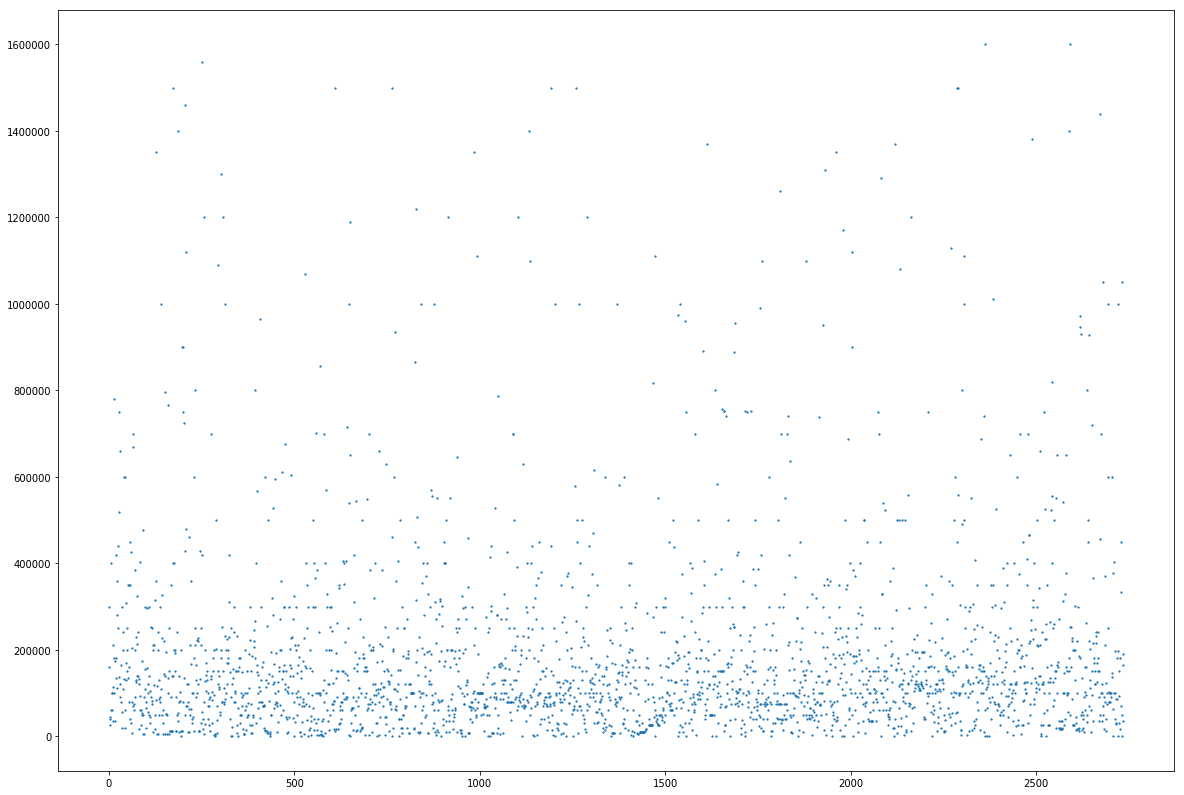

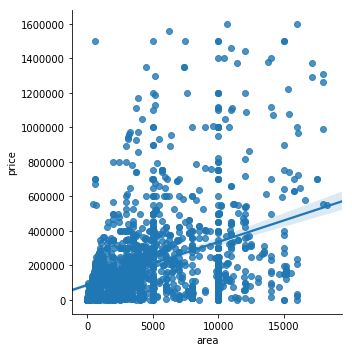

In [84]:
def remove_outliers(df, standardize = None, 
                    logg = None, normalize = None, 
                    lower_quartile = None, upper_quartile = None, multiplier = None):
  
  #drop all objects
  #and leaving all float64 and int64 datatypes
  for ii in hosue_df.columns:
    if hosue_df[ii].dtype == object:
      df = df.drop(ii, axis = 1)
  
  df = df.copy(deep = True)
  quart_1 = df.quantile(lower_quartile)
  quart_2 = df.quantile(upper_quartile)
  diff_quart = quart_2 - quart_1
  df = df[~((df < (quart_1 - 1.5 * diff_quart)) |(df > (quart_2 + 1.5 * diff_quart))).any(axis=1)]
  '''
  #standardize values
        x - mean of x
  z = --------------------
          sd of x
          
  #log values
  
  z = log(x)
  
  #normalize values
  
          x - min(x)
  z = --------------------
          max(x) - min(x)
  '''
  
  #standard deviation
  def stdev(df):
    return np.std(df, axis = 0)
  #mean deviation
  def mean_dev(df):
    return df - np.mean(df, axis = 0)
  #log of data
  def logg_dat(df):
    return np.log(df)
  
  #standardized values for columns
  if standardize:
    for ii, ij in enumerate(df.columns):
      print(ii, ij)
      df['{}'.format(ij)] = mean_dev(df.loc[:, '{}'.format(ij)])/stdev(df.loc[:, '{}'.format(ij)])
  elif logg:
    df = logg_dat(df)
    df = df.replace([np.inf, -np.inf, np.nan], 0)
  elif normalize:
    for ii, ij in enumerate(df.columns):
      df['{}'.format(ij)] = (df.loc[:, '{}'.format(ij)] - min(df.loc[:, '{}'.format(ij)]))/\
      (max(df.loc[:, '{}'.format(ij)]) - min(df.loc[:, '{}'.format(ij)]))
  else:
    pass
    
  return df

df_no_out = remove_outliers(hosue_df, lower_quartile = .25, upper_quartile = .75, multiplier = .5)
df_standard_no_out = remove_outliers(hosue_df, standardize = True, lower_quartile = .25, upper_quartile = .75, multiplier = .5)
log_data_no_out = remove_outliers(hosue_df, logg=True, lower_quartile = .25, upper_quartile = .75, multiplier = .5)
df_normal_no_out = remove_outliers(hosue_df, normalize = True, lower_quartile = .25, upper_quartile = .75, multiplier = .5)


plt.scatter(np.arange(df_no_out.shape[0]), df_no_out.price, s = 1.5)
sns.lmplot('area', 'price', df_no_out)

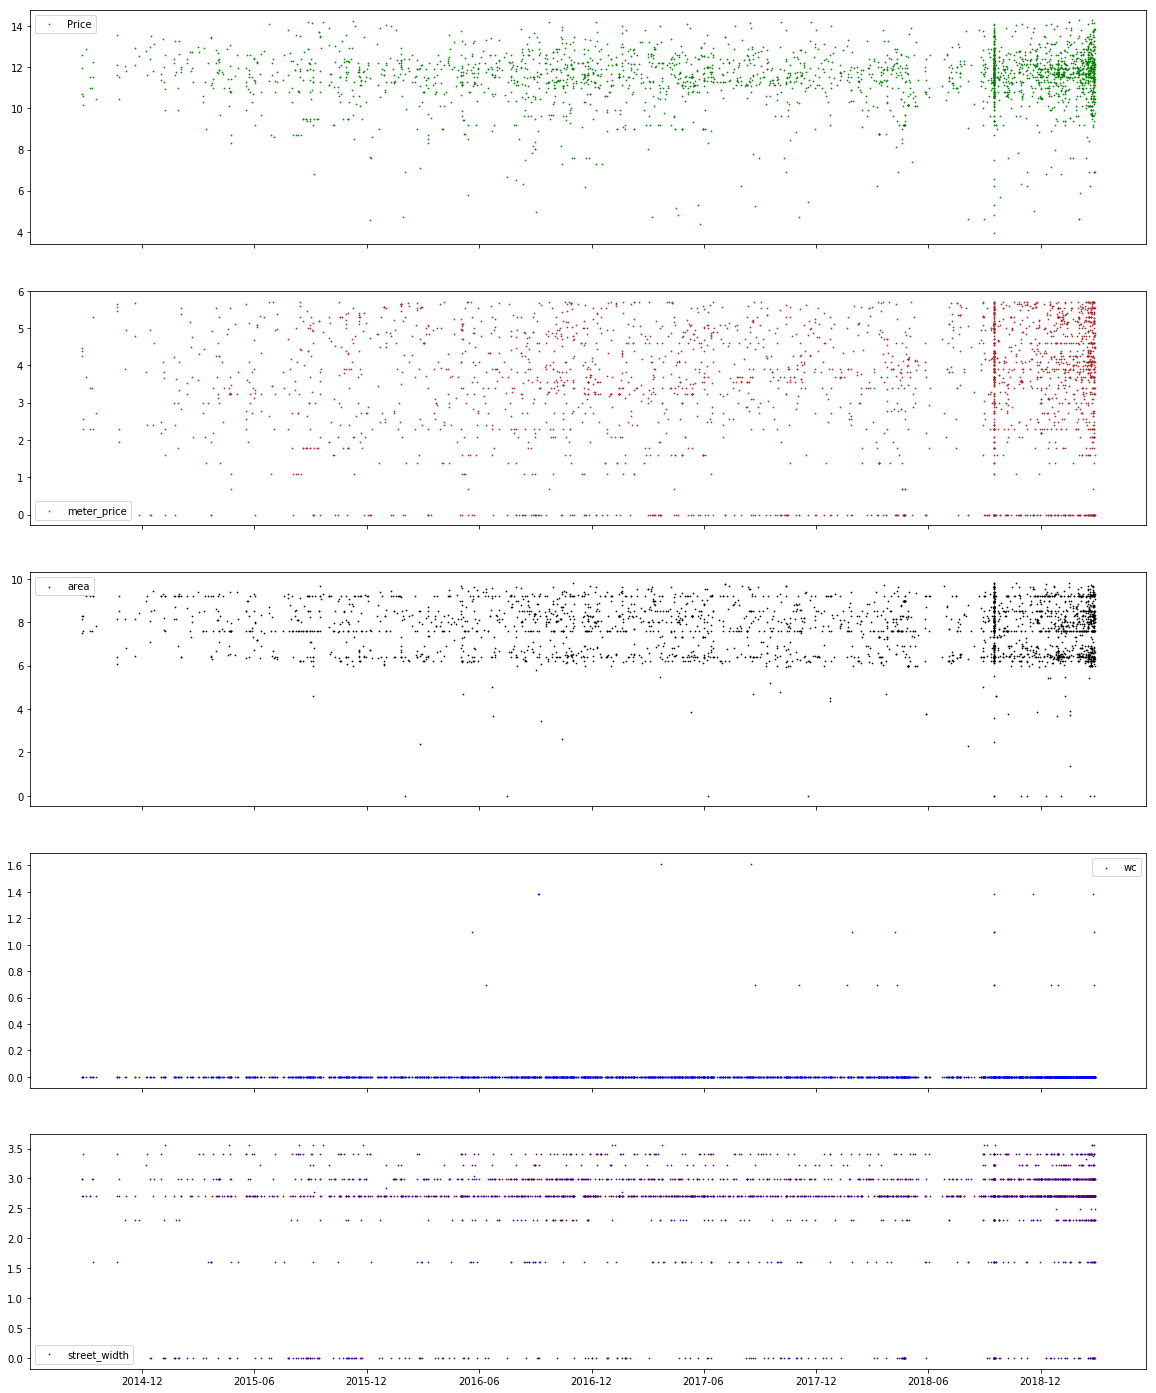

In [74]:
rcParams['figure.figsize'] = 20, 25
color = ['red', 'green', 'brown', 'black', 'blue', 'indigo']
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 1, sharex= True)
ax1.scatter(log_data_no_out.index, log_data_no_out.price.values, s = .5, color = color[1], label='Price')
ax1.legend()
ax2.scatter(log_data_no_out.index, log_data_no_out.meter_price.values, s = .5, color = color[2], label='meter_price')
ax2.legend()
ax3.scatter(log_data_no_out.index, log_data_no_out.area.values, s = .5, color = color[3], label='area')
ax3.legend()
ax4.scatter(log_data_no_out.index, log_data_no_out.wc.values, s = .5, color = color[4], label='wc')
ax4.legend()
ax5.scatter(log_data_no_out.index, log_data_no_out.street_width.values, s = .5, color = color[5], label='street_width')
ax5.legend()


### From here you can see how the outlier function effectively dealt with the data with having to set data.price limits to remove. Compare this two graph

#### The only problem is that more than half of the data was trimmed as outlier. As you can see below.
###### Question! Could this be True? *

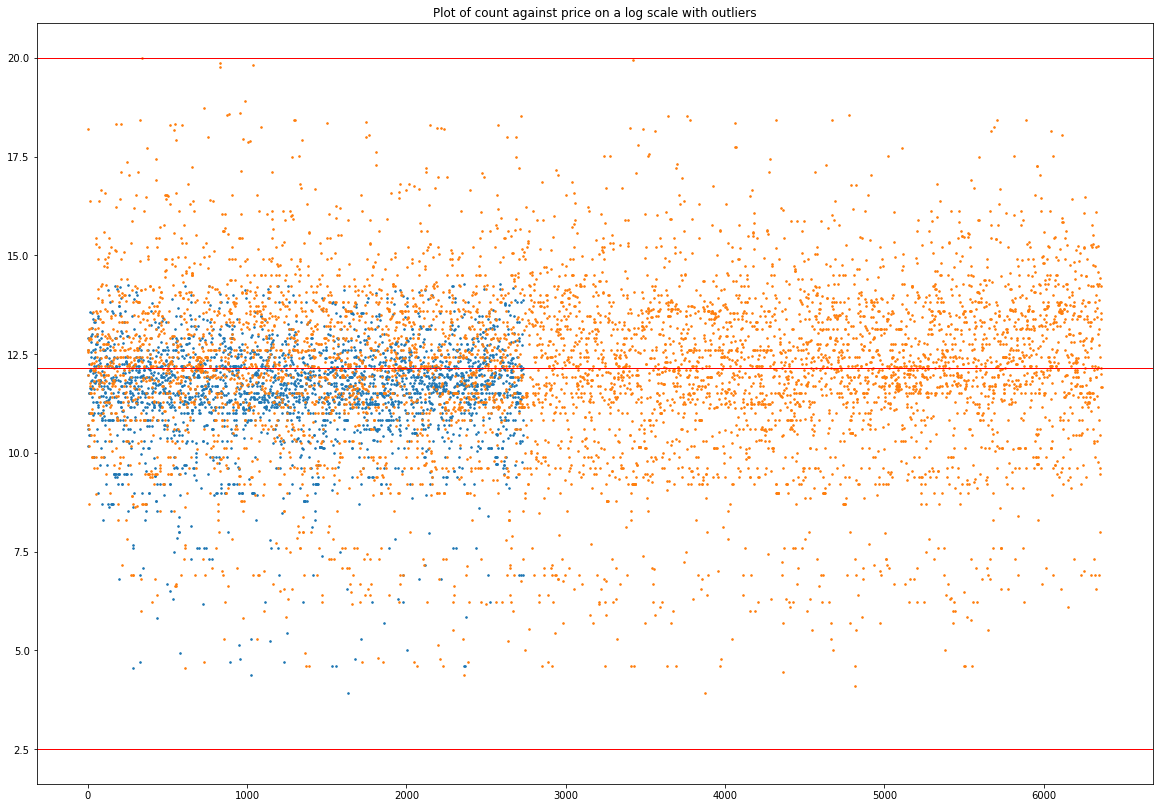

In [83]:
#plot log_price
rcParams['figure.figsize'] = 20, 14
plt.scatter(np.arange(log_data_no_out.shape[0]), log_data_no_out.price, s = 2.5)
plt.title('Plot of count against price on a log scale without outliers')
plt.axhline(y = 20, linewidth=1, color='r')
plt.axhline(y = 2.5, linewidth=1, color='r')
plt.axhline(y = 12.159753818376581, linewidth=1, color='r')

##plot log_price  using price range
plt.scatter(np.arange(after_outl.shape[0]), after_outl.price, s = 2.5)
plt.title('Plot of count against price on a log scale with outliers')
plt.axhline(y = 20, linewidth=1, color='r')
plt.axhline(y = 2.5, linewidth=1, color='r')
plt.axhline(y = 12.159753818376581, linewidth=1, color='r')

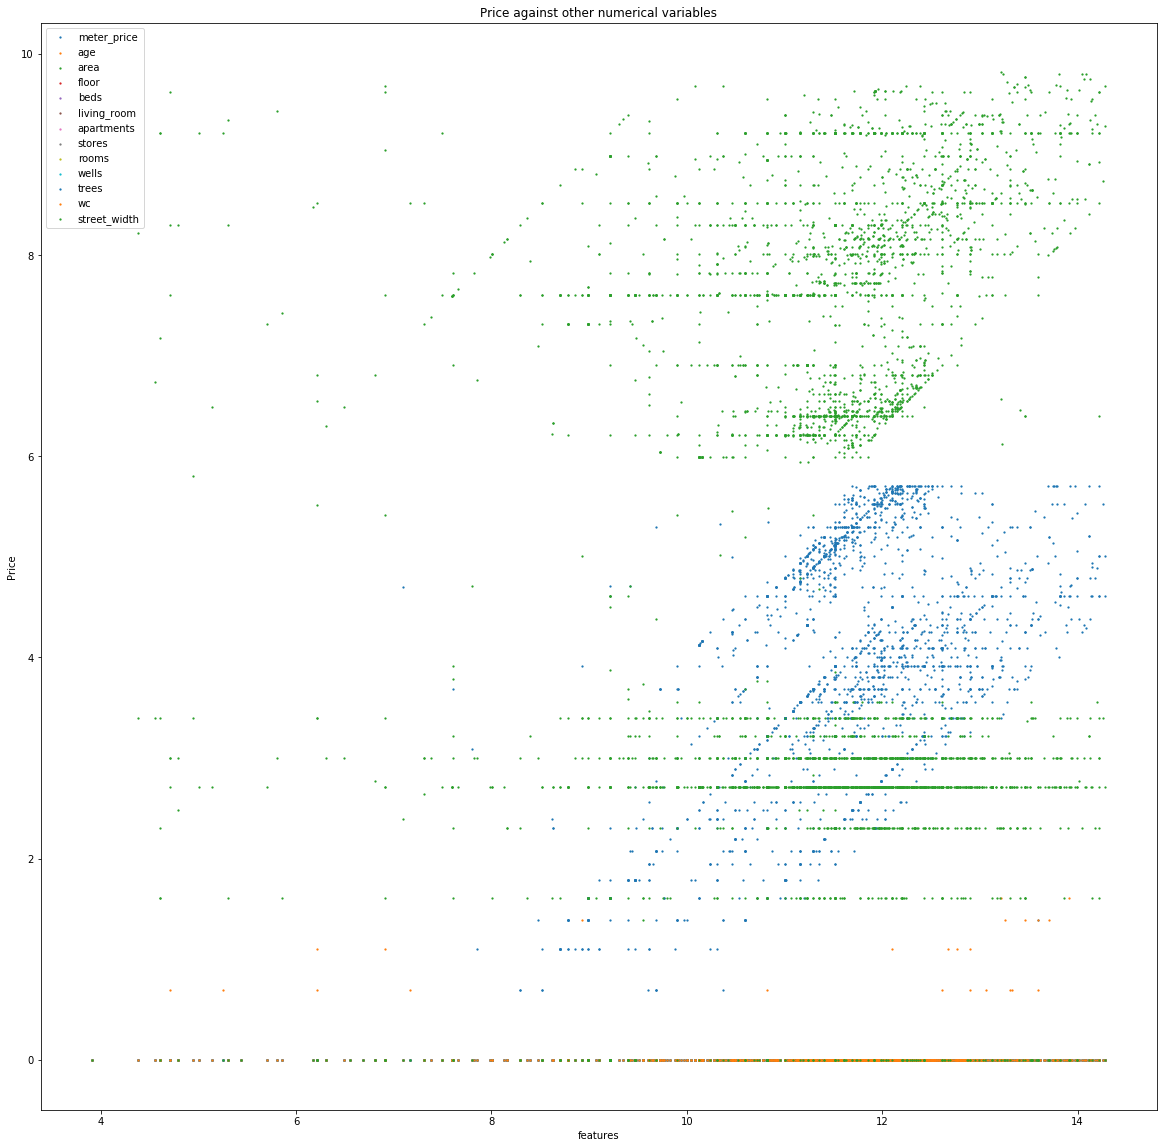

In [86]:
#%% plot price with all other numeric features
rcParams['figure.figsize'] = 20, 20
def plotit(df):
  if 'price' in df.columns:
    for ii in df.columns[1:]:
      plt.scatter(df['price'], df[ii], cmap='Sequential', s = 1.5)
      plt.legend()
      plt.ylabel('Price')
      plt.xlabel('features')
      plt.title('Price against other numerical variables')
      
plotit(log_data_no_out)

###### From here you will find out that it makes sense to have the outliers removed as can be seen above. The chart right down however shows alot of deviation in data begining from around 18 and upwards.

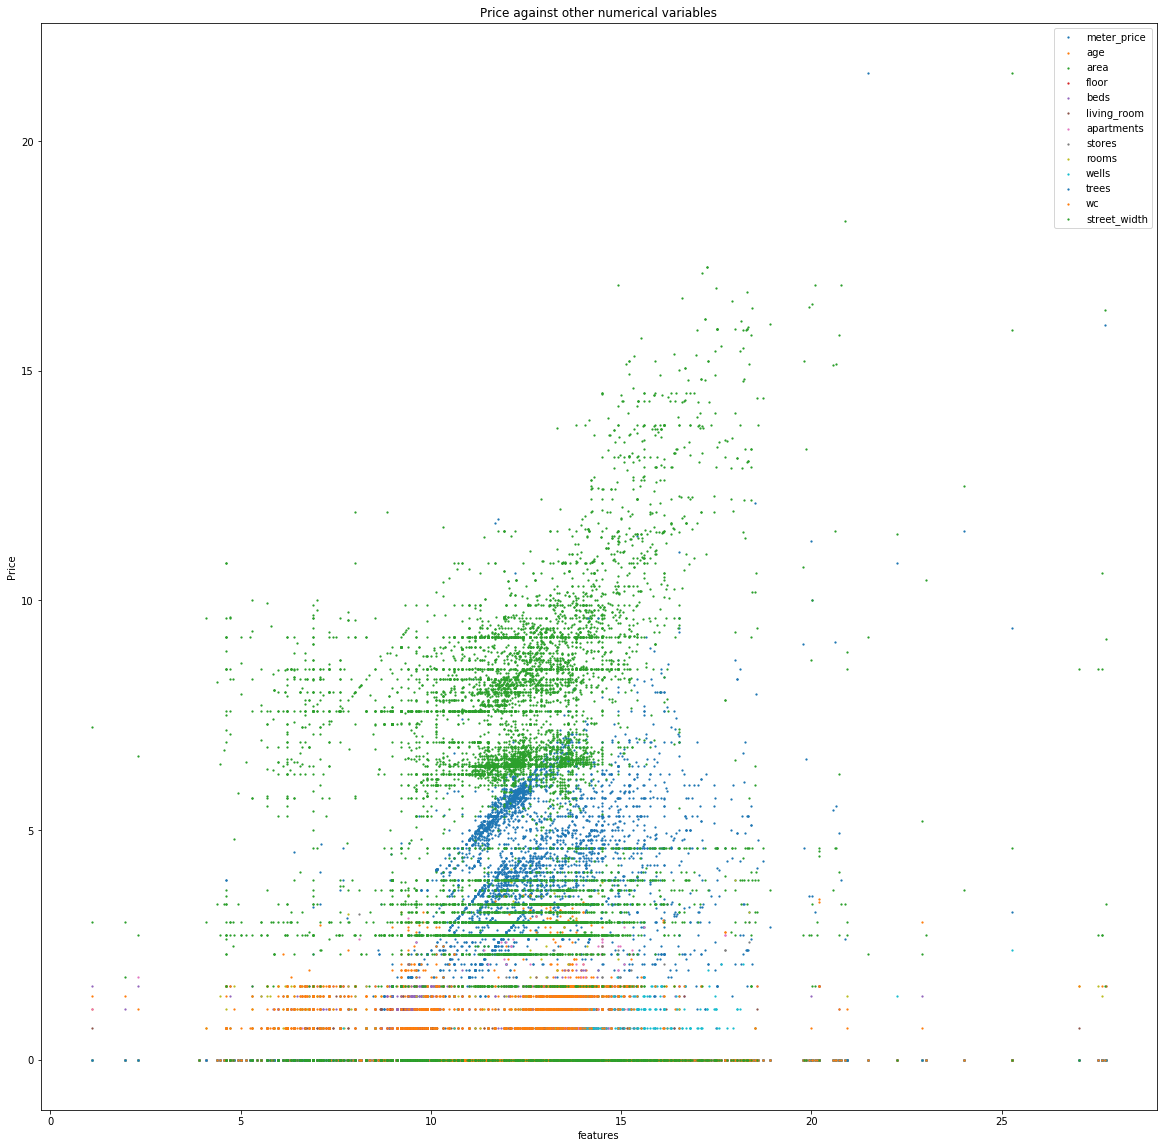

In [87]:
plotit(log_data)

# Feature Engineering

#### Here we will use two prominent algorithms to find out we features contribute more the price eveluation/prediction and why.

#### We will use Random Forest and XGBoost  as both have been proven to predict with a very high accuracy the features without parameter tunning.

In [88]:
from xgboost import XGBRegressor
from xgboost import plot_importance

def plot_features():
  fig, ax = plt.subplots(1, 1, figsize = figsize)
  return plot_importance()